In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

%matplotlib inline


In [2]:
data = pd.read_csv('genetic_variants.csv', sep=',')
data

C:\Users\angel\anaconda3\envs\genetic_variants\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (0,38,40) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,CHROM,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNDISDB,CLNDISDBINCL,CLNDN,CLNDNINCL,CLNHGVS,CLNSIGINCL,CLNVC,CLNVI,MC,ORIGIN,SSR,CLASS,Allele,Consequence,IMPACT,SYMBOL,Feature_type,Feature,BIOTYPE,EXON,INTRON,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,DISTANCE,STRAND,BAM_EDIT,SIFT,PolyPhen,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62
0,1,1168180,G,C,0.0771,0.10020,0.1066,MedGen:CN169374,NaN,not_specified,NaN,NC_000001.10:g.1168180G>C,NaN,single_nucleotide_variant,UniProtKB_(protein):Q96L58#VAR_059317,SO:0001583|missense_variant,1,NaN,0,C,missense_variant,MODERATE,B3GALT6,Transcript,NM_080605.3,protein_coding,1/1,NaN,552,522,174,E/D,gaG/gaC,NaN,1.0,NaN,tolerated,benign,NaN,NaN,NaN,NaN,NaN,1.053,-0.208682,2.0
1,1,1470752,G,A,0.0000,0.00000,0.0000,"MedGen:C1843891,OMIM:607454,Orphanet:ORPHA9877...",NaN,Spinocerebellar_ataxia_21|not_provided,NaN,NC_000001.10:g.1470752G>A,NaN,single_nucleotide_variant,OMIM_Allelic_Variant:616101.0001|UniProtKB_(pr...,SO:0001583|missense_variant,1,NaN,0,A,missense_variant,MODERATE,TMEM240,Transcript,NM_001114748.1,protein_coding,4/4,NaN,523,509,170,P/L,cCg/cTg,NaN,-1.0,OK,deleterious_low_confidence,benign,NaN,NaN,NaN,NaN,NaN,31.000,6.517838,-3.0
2,1,1737942,A,G,0.0000,0.00001,0.0000,"Human_Phenotype_Ontology:HP:0000486,MedGen:C00...",NaN,Strabismus|Nystagmus|Hypothyroidism|Intellectu...,NaN,NC_000001.10:g.1737942A>G,NaN,single_nucleotide_variant,OMIM_Allelic_Variant:139380.0002|UniProtKB_(pr...,"SO:0001583|missense_variant,SO:0001623|5_prime...",35,NaN,1,G,missense_variant,MODERATE,GNB1,Transcript,NM_002074.4,protein_coding,6/12,NaN,632,239,80,I/T,aTc/aCc,NaN,-1.0,OK,deleterious,probably_damaging,NaN,NaN,NaN,NaN,NaN,28.100,6.061752,-1.0
3,1,2160305,G,A,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002...",NaN,Shprintzen-Goldberg_syndrome|not_provided,NaN,NC_000001.10:g.2160305G>A,NaN,single_nucleotide_variant,OMIM_Allelic_Variant:164780.0004|UniProtKB_(pr...,SO:0001583|missense_variant,33,NaN,0,A,missense_variant,MODERATE,SKI,Transcript,XM_005244775.1,protein_coding,1/7,NaN,132,100,34,G/S,Ggc/Agc,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.500,3.114491,NaN
4,1,2160305,G,T,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002",NaN,Shprintzen-Goldberg_syndrome,NaN,NC_000001.10:g.2160305G>T,NaN,single_nucleotide_variant,OMIM_Allelic_Variant:164780.0005|UniProtKB_(pr...,SO:0001583|missense_variant,33,NaN,0,T,missense_variant,MODERATE,SKI,Transcript,XM_005244775.1,protein_coding,1/7,NaN,132,100,34,G/C,Ggc/Tgc,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.700,4.766224,-3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65183,X,154158201,T,G,0.0801,0.13923,0.1605,"MedGen:C0019069,OMIM:306700,SNOMED_CT:28293008...",NaN,Hereditary_factor_VIII_deficiency_disease|not_...,NaN,NC_000023.10:g.154158201T>G,NaN,single_nucleotide_variant,"ARUP_Laboratories,_Molecular_Genetics_and_Geno...",SO:0001819|synonymous_variant,1,NaN,0,G,synonymous_variant,LOW,F8,Transcript,NM_000132.3,protein_coding,14/26,NaN,4035,3864,1288,S,tcA/tcC,NaN,-1.0,OK,NaN,NaN,NaN,NaN,NaN,NaN,0.00158,0.105,-0.630908,NaN
65184,X,154159118,C,T,0.0020,0.00060,0.0013,MedGen:CN169374|MedGen:CN239152,NaN,"not_specified|Hemophilia_A,_FVIII_Deficiency",NaN,NC_000023.10:g.154159118C>T,NaN,single_nucleotide_variant,"ARUP_Laboratories,_Molecular_Genetics_and_Geno...",SO:0001583|missense_variant,1,NaN,1,T,missense_variant,MODERATE,F8,Transcript,NM_000132.3,protein_coding,14/26,NaN,3118,2947,983,V/I,Gta/Ata,NaN,-1.0,OK,tolerated,benign,NaN,NaN,NaN,NaN,0.00158,0.002,-1.731470,3.0
65185,X,154194886,C,T,0.0125,0.00370,0.0111,MedGen:CN169374|MedGen:CN239152,NaN,"not_specified|Hemophilia_A,_FVIII_Deficiency",NaN,NC_000023.10:g.154194886C>T,NaN,single_nucleotide_variant,"ARUP_Laboratories,_Molecular_Genetics_and_Geno...",SO:0001819|synony

In [3]:
data.columns

Index(['CHROM', 'POS', 'REF', 'ALT', 'AF_ESP', 'AF_EXAC', 'AF_TGP', 'CLNDISDB',
       'CLNDISDBINCL', 'CLNDN', 'CLNDNINCL', 'CLNHGVS', 'CLNSIGINCL', 'CLNVC',
       'CLNVI', 'MC', 'ORIGIN', 'SSR', 'CLASS', 'Allele', 'Consequence',
       'IMPACT', 'SYMBOL', 'Feature_type', 'Feature', 'BIOTYPE', 'EXON',
       'INTRON', 'cDNA_position', 'CDS_position', 'Protein_position',
       'Amino_acids', 'Codons', 'DISTANCE', 'STRAND', 'BAM_EDIT', 'SIFT',
       'PolyPhen', 'MOTIF_NAME', 'MOTIF_POS', 'HIGH_INF_POS',
       'MOTIF_SCORE_CHANGE', 'LoFtool', 'CADD_PHRED', 'CADD_RAW', 'BLOSUM62'],
      dtype='object')

In [4]:
data.loc[6628]

CHROM                                                                 1
POS                                                            17331312
REF                                                      CCAGGCTGGGGAAG
ALT                                                                   C
AF_ESP                                                              0.0
AF_EXAC                                                         0.00002
AF_TGP                                                              0.0
CLNDISDB              MedGen:C1847640,OMIM:606693,Orphanet:ORPHA3066...
CLNDISDBINCL                                                        NaN
CLNDN                                 Parkinson_disease_9|not_specified
CLNDNINCL                                                           NaN
CLNHGVS                NC_000001.10:g.17331313_17331325delCAGGCTGGGGAAG
CLNSIGINCL                                                          NaN
CLNVC                                                          D

## Variables en el datasheet
### Columnas fijas del formato VCF 
- CHROM : identificador en forma RefSeq del cromosoma
- Pos : posición relativa en el cromosoma
- REF : par de base de referencia
- ALT : par de base del alelo

### Frecuencias del alelo según distintas fuentes
- AF_ESP : Frecuencias del alelo en la población según el repositorio GO-ESP
- AF_EXAC : Frecuencias del alelo en la población según el repositorio ExAC
- AF_TGP : Frecuencias del alelo en la población según el repositorio 1000 genomes project

### Tags de ClinVar
- CLNDISDB : enfermedades relacionadas con el par de base 
- CLNDISDBINCL :
- CLNDN : nombre de la enfermedad relacionado con el par de base
- CLNDNINCL :
- CLNHGVS : representación del alelo en formato HGVS
- CLNSIGINCL : A string that describes the variant's clinical significance.  One of the following values may be assigned: 0 unknown, 1 untested, 2 nonpathogenic, 3 probable-nonpathogenic, 4 probable-pathogenic, 5 pathogenic, 6 drug-response, 7 histocompatibility, 255 other.
- CLNVC : efecto del alelo en el par de base
- CLNVI : proteinas relacionadas según fuentes ajenas a ClinVar

### Otras variables
- MC : consecuencia molecular
- ORIGIN :
- SSR : Variant suspect reason code.  The accepted values for this tag are: 0 unspecified, 1 Paralog, 2 byEST, 4 oldAlign, 8 Para_EST, 16 1KG_failed, 1024 other.
- CLASS : La clase que delimita si la alteración es benigna o maligna.
- Allele : 
- Consequence : Consecuencia de la alteración
- IMPACT : Importancia de la consecuencia en la alteración
- SYMBOL : Referencia al simbolo del gen
- Feature_type :
- Feature :
- BIOTYPE : 
- EXON :
- INTRON :
- cDNA_position :
- Protein_position :
- Amino_acids :
- Codons :
- DISTANCE :
- STRAND :
- BAM_EDIT :
- SIFT :
- Polyphen :
- MOTIF_NAME :
- MOTIF_POS :
- HIGH_INF_POS :
- MOTIF_SCORE_CHANGE :
- LoFtool :
- CADD_PHRED : 
- BLOSUM62 :


Parece que tenemos una variable repetida, la representación del alelo, vamos a comprobar si es igual para todos los casos

In [5]:
(data["Allele"] == data["ALT"]).all()

False

In [6]:
data[(data["Allele"] != data["ALT"])]

,CHROM,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNDISDB,CLNDISDBINCL,CLNDN,CLNDNINCL,CLNHGVS,CLNSIGINCL,CLNVC,CLNVI,MC,ORIGIN,SSR,CLASS,Allele,Consequence,IMPACT,SYMBOL,Feature_type,Feature,BIOTYPE,EXON,INTRON,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,DISTANCE,STRAND,BAM_EDIT,SIFT,PolyPhen,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62
6250,1,2338019,CAG,C,0.0002,0.00005,0.0000,"MedGen:C0043459,OMIM:214100,Orphanet:ORPHA912,...",NaN,Zellweger_syndrome|Peroxisome_biogenesis_disor...,NaN,NC_000001.10:g.2338020_2338021delAG,NaN,Deletion,"Illumina_Clinical_Services_Laboratory,Illumina...",SO:0001589|frameshift_variant,1,NaN,0,-,frameshift_variant,HIGH,PEX10,Transcript,NM_153818.1,protein_coding,5/6,NaN,943-944,874-875,292,L/X,CTg/g,NaN,-1.0,OK,NaN,NaN,NaN,NaN,NaN,NaN,0.2340,32.000,6.801215,NaN
6251,1,2338230,C,CT,0.0000,0.00000,0.0000,"MedGen:C3553947,OMIM:614870|MedGen:C3553948,OM...",NaN,Peroxisome_biogenesis_disorder_6A|Peroxisome_b...,NaN,NC_000001.10:g.2338231dupT,NaN,Duplication,OMIM_Allelic_Variant:602859.0005,SO:0001589|frameshift_variant,1,NaN,0,T,frameshift_variant,HIGH,PEX10,Transcript,NM_153818.1,protein_coding,4/6,NaN,833-834,764-765,255,Q/QX,cag/caAg,NaN,-1.0,OK,NaN,NaN,NaN,NaN,NaN,NaN,0.2340,28.800,6.225104,NaN
6272,1,3319570,GCCCTCCTCTGAGTCTTCCTCCCCTTCCCGTA,G,0.0000,0.00000,0.0000,"MedGen:C3809288,OMIM:615373|MedGen:CN169374",NaN,Left_ventricular_noncompaction_8|not_specified,NaN,NC_000001.10:g.3319601_3319631del31,NaN,Deletion,NaN,SO:0001627|intron_variant,1,NaN,1,-,intron_variant,MODIFIER,PRDM16,Transcript,XM_005244772.1,protein_coding,NaN,6/16,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1010,5.677,0.298323,NaN
6371,1,6038476,AG,A,0.0000,0.00275,0.0058,"MedGen:C0687120,Orphanet:ORPHA655,SNOMED_CT:20...",NaN,Nephronophthisis|Renal_dysplasia_and_retinal_a...,NaN,NC_000001.10:g.6038477delG,NaN,Deletion,"Illumina_Clinical_Services_Laboratory,Illumina...",SO:0001627|intron_variant,1,NaN,0,-,splice_region_variant&intron_variant,LOW,NPHP4,Transcript,NM_015102.3,protein_coding,NaN,2/29,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0210,2.390,-0.020886,NaN
6395,1,6529182,TTCCTCC,T,0.0000,0.00000,0.0000,"MedGen:C1970211,OMIM:611067,Orphanet:ORPHA2065...",NaN,"Distal_spinal_muscular_atrophy,_autosomal_rece...",NaN,NC_000001.10:g.6529183_6529188delTCCTCC,NaN,Deletion,NaN,NaN,1,NaN,0,-,inframe_deletion,MODERATE,PLEKHG5,Transcript,NM_001265592.1,protein_coding,20/22,NaN,2465-2470,2400-2405,800-802,EEE/E,gaGGAGGAa/gaa,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8030,9.387,0.787595,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65123,X,153607903,AC,A,0.0000,0.00000,0.0000,"MedGen:C0751337,OMIM:310300|MedGen:CN517202",NaN,"Emery-Dreifuss_muscular_dystrophy_1,_X-linked|...",NaN,NC_000023.10:g.153607904delC,NaN,Deletion,NaN,SO:0001589|frameshift_variant,1,NaN,0,-,frameshift_variant,HIGH,EMD,Transcript,NM_000117.2,protein_coding,1/6,NaN,308,60,20,N/X,aaC/aa,NaN,1.0,OK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65129,X,153608361,TTACTC,T,0.0000,0.00000,0.0000,MedGen:CN517202,NaN,not_provided,NaN,NC_000023.10:g.153608365_153608369delTCTAC,NaN,Deletion,NaN,SO:0001589|frameshift_variant,17,NaN,0,-,frameshift_variant,HIGH,EMD,Transcript,NM_000117.2,protein_coding,3/6,NaN,496-500,248-252,83-84,LL/X,tTACTC/t,NaN,1.0,OK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.000,7.440430,NaN
65163,X,153760685,GGA,G,0.0000,0.00000,0.0000,"MedGen:C0017758,Orphanet:ORPHA362|MedGen:CN169374",NaN,Glucose_6_phosphate_dehydrogenase_deficiency|n...,NaN,NC_000023.10:g.153760686_153760687delGA,NaN,Deletion,"Illumina_Clinical_Services_Laboratory,Illumina...",SO:0001627|intron_variant,1,NaN,1,-,intron_variant,MODIFIER,G6PD,Transcript,XM_005274657.1,protein_coding,NaN,10/12,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0169,1.074,-0.204554,NaN
651

In [7]:
not_equals = data[(data["Allele"] == data["ALT"])]["CLNVC"].unique()
equals = data[(data["Allele"] != data["ALT"])]["CLNVC"].unique()  
total = set(not_equals) | set(equals)
[i for i in total if i not in not_equals or i not in equals]

['Indel',
 'Insertion',
 'Duplication',
 'Deletion',
 'Inversion',
 'single_nucleotide_variant',
 'Microsatellite']

In [8]:
not_equals = data[(data["Allele"] == data["ALT"])]["IMPACT"].unique()
equals = data[(data["Allele"] != data["ALT"])]["IMPACT"].unique()  
total = set(not_equals) | set(equals)
[i for i in total if i not in not_equals or i not in equals]

[]

Como no vemos ningún tipo de correlacción entre las diferencias de ALT y Allele y el código de referencia no parece tener ningún tipo de procesamiento singular para las consecuencias podemos asumir un error en el input. También vemos que están afectados 3000 variantes, es decir; menos de un 5% de nuestra colección. Vamos a eliminar estos elementos y también los casos de variantes de más de un par de base. El total va eliminar entorno a un 6% de las variantes.

In [9]:
filtered_Allele = (data["ALT"].str.len()== 1) & (data["Allele"].str.len()== 1) & (data["REF"].str.len()== 1)
data = data[filtered_Allele]
data

,CHROM,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNDISDB,CLNDISDBINCL,CLNDN,CLNDNINCL,CLNHGVS,CLNSIGINCL,CLNVC,CLNVI,MC,ORIGIN,SSR,CLASS,Allele,Consequence,IMPACT,SYMBOL,Feature_type,Feature,BIOTYPE,EXON,INTRON,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,DISTANCE,STRAND,BAM_EDIT,SIFT,PolyPhen,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62
0,1,1168180,G,C,0.0771,0.10020,0.1066,MedGen:CN169374,NaN,not_specified,NaN,NC_000001.10:g.1168180G>C,NaN,single_nucleotide_variant,UniProtKB_(protein):Q96L58#VAR_059317,SO:0001583|missense_variant,1,NaN,0,C,missense_variant,MODERATE,B3GALT6,Transcript,NM_080605.3,protein_coding,1/1,NaN,552,522,174,E/D,gaG/gaC,NaN,1.0,NaN,tolerated,benign,NaN,NaN,NaN,NaN,NaN,1.053,-0.208682,2.0
1,1,1470752,G,A,0.0000,0.00000,0.0000,"MedGen:C1843891,OMIM:607454,Orphanet:ORPHA9877...",NaN,Spinocerebellar_ataxia_21|not_provided,NaN,NC_000001.10:g.1470752G>A,NaN,single_nucleotide_variant,OMIM_Allelic_Variant:616101.0001|UniProtKB_(pr...,SO:0001583|missense_variant,1,NaN,0,A,missense_variant,MODERATE,TMEM240,Transcript,NM_001114748.1,protein_coding,4/4,NaN,523,509,170,P/L,cCg/cTg,NaN,-1.0,OK,deleterious_low_confidence,benign,NaN,NaN,NaN,NaN,NaN,31.000,6.517838,-3.0
2,1,1737942,A,G,0.0000,0.00001,0.0000,"Human_Phenotype_Ontology:HP:0000486,MedGen:C00...",NaN,Strabismus|Nystagmus|Hypothyroidism|Intellectu...,NaN,NC_000001.10:g.1737942A>G,NaN,single_nucleotide_variant,OMIM_Allelic_Variant:139380.0002|UniProtKB_(pr...,"SO:0001583|missense_variant,SO:0001623|5_prime...",35,NaN,1,G,missense_variant,MODERATE,GNB1,Transcript,NM_002074.4,protein_coding,6/12,NaN,632,239,80,I/T,aTc/aCc,NaN,-1.0,OK,deleterious,probably_damaging,NaN,NaN,NaN,NaN,NaN,28.100,6.061752,-1.0
3,1,2160305,G,A,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002...",NaN,Shprintzen-Goldberg_syndrome|not_provided,NaN,NC_000001.10:g.2160305G>A,NaN,single_nucleotide_variant,OMIM_Allelic_Variant:164780.0004|UniProtKB_(pr...,SO:0001583|missense_variant,33,NaN,0,A,missense_variant,MODERATE,SKI,Transcript,XM_005244775.1,protein_coding,1/7,NaN,132,100,34,G/S,Ggc/Agc,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.500,3.114491,NaN
4,1,2160305,G,T,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002",NaN,Shprintzen-Goldberg_syndrome,NaN,NC_000001.10:g.2160305G>T,NaN,single_nucleotide_variant,OMIM_Allelic_Variant:164780.0005|UniProtKB_(pr...,SO:0001583|missense_variant,33,NaN,0,T,missense_variant,MODERATE,SKI,Transcript,XM_005244775.1,protein_coding,1/7,NaN,132,100,34,G/C,Ggc/Tgc,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.700,4.766224,-3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65183,X,154158201,T,G,0.0801,0.13923,0.1605,"MedGen:C0019069,OMIM:306700,SNOMED_CT:28293008...",NaN,Hereditary_factor_VIII_deficiency_disease|not_...,NaN,NC_000023.10:g.154158201T>G,NaN,single_nucleotide_variant,"ARUP_Laboratories,_Molecular_Genetics_and_Geno...",SO:0001819|synonymous_variant,1,NaN,0,G,synonymous_variant,LOW,F8,Transcript,NM_000132.3,protein_coding,14/26,NaN,4035,3864,1288,S,tcA/tcC,NaN,-1.0,OK,NaN,NaN,NaN,NaN,NaN,NaN,0.00158,0.105,-0.630908,NaN
65184,X,154159118,C,T,0.0020,0.00060,0.0013,MedGen:CN169374|MedGen:CN239152,NaN,"not_specified|Hemophilia_A,_FVIII_Deficiency",NaN,NC_000023.10:g.154159118C>T,NaN,single_nucleotide_variant,"ARUP_Laboratories,_Molecular_Genetics_and_Geno...",SO:0001583|missense_variant,1,NaN,1,T,missense_variant,MODERATE,F8,Transcript,NM_000132.3,protein_coding,14/26,NaN,3118,2947,983,V/I,Gta/Ata,NaN,-1.0,OK,tolerated,benign,NaN,NaN,NaN,NaN,0.00158,0.002,-1.731470,3.0
65185,X,154194886,C,T,0.0125,0.00370,0.0111,MedGen:CN169374|MedGen:CN239152,NaN,"not_specified|Hemophilia_A,_FVIII_Deficiency",NaN,NC_000023.10:g.154194886C>T,NaN,single_nucleotide_variant,"ARUP_Laboratories,_Molecular_Genetics_and_Geno...",SO:0001819|synony

Ya podemos eliminar una de las columnas "Allele" o "ALT"

In [10]:
data = data.drop(columns =["Allele"])
data

,CHROM,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNDISDB,CLNDISDBINCL,CLNDN,CLNDNINCL,CLNHGVS,CLNSIGINCL,CLNVC,CLNVI,MC,ORIGIN,SSR,CLASS,Consequence,IMPACT,SYMBOL,Feature_type,Feature,BIOTYPE,EXON,INTRON,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,DISTANCE,STRAND,BAM_EDIT,SIFT,PolyPhen,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62
0,1,1168180,G,C,0.0771,0.10020,0.1066,MedGen:CN169374,NaN,not_specified,NaN,NC_000001.10:g.1168180G>C,NaN,single_nucleotide_variant,UniProtKB_(protein):Q96L58#VAR_059317,SO:0001583|missense_variant,1,NaN,0,missense_variant,MODERATE,B3GALT6,Transcript,NM_080605.3,protein_coding,1/1,NaN,552,522,174,E/D,gaG/gaC,NaN,1.0,NaN,tolerated,benign,NaN,NaN,NaN,NaN,NaN,1.053,-0.208682,2.0
1,1,1470752,G,A,0.0000,0.00000,0.0000,"MedGen:C1843891,OMIM:607454,Orphanet:ORPHA9877...",NaN,Spinocerebellar_ataxia_21|not_provided,NaN,NC_000001.10:g.1470752G>A,NaN,single_nucleotide_variant,OMIM_Allelic_Variant:616101.0001|UniProtKB_(pr...,SO:0001583|missense_variant,1,NaN,0,missense_variant,MODERATE,TMEM240,Transcript,NM_001114748.1,protein_coding,4/4,NaN,523,509,170,P/L,cCg/cTg,NaN,-1.0,OK,deleterious_low_confidence,benign,NaN,NaN,NaN,NaN,NaN,31.000,6.517838,-3.0
2,1,1737942,A,G,0.0000,0.00001,0.0000,"Human_Phenotype_Ontology:HP:0000486,MedGen:C00...",NaN,Strabismus|Nystagmus|Hypothyroidism|Intellectu...,NaN,NC_000001.10:g.1737942A>G,NaN,single_nucleotide_variant,OMIM_Allelic_Variant:139380.0002|UniProtKB_(pr...,"SO:0001583|missense_variant,SO:0001623|5_prime...",35,NaN,1,missense_variant,MODERATE,GNB1,Transcript,NM_002074.4,protein_coding,6/12,NaN,632,239,80,I/T,aTc/aCc,NaN,-1.0,OK,deleterious,probably_damaging,NaN,NaN,NaN,NaN,NaN,28.100,6.061752,-1.0
3,1,2160305,G,A,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002...",NaN,Shprintzen-Goldberg_syndrome|not_provided,NaN,NC_000001.10:g.2160305G>A,NaN,single_nucleotide_variant,OMIM_Allelic_Variant:164780.0004|UniProtKB_(pr...,SO:0001583|missense_variant,33,NaN,0,missense_variant,MODERATE,SKI,Transcript,XM_005244775.1,protein_coding,1/7,NaN,132,100,34,G/S,Ggc/Agc,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.500,3.114491,NaN
4,1,2160305,G,T,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002",NaN,Shprintzen-Goldberg_syndrome,NaN,NC_000001.10:g.2160305G>T,NaN,single_nucleotide_variant,OMIM_Allelic_Variant:164780.0005|UniProtKB_(pr...,SO:0001583|missense_variant,33,NaN,0,missense_variant,MODERATE,SKI,Transcript,XM_005244775.1,protein_coding,1/7,NaN,132,100,34,G/C,Ggc/Tgc,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.700,4.766224,-3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65183,X,154158201,T,G,0.0801,0.13923,0.1605,"MedGen:C0019069,OMIM:306700,SNOMED_CT:28293008...",NaN,Hereditary_factor_VIII_deficiency_disease|not_...,NaN,NC_000023.10:g.154158201T>G,NaN,single_nucleotide_variant,"ARUP_Laboratories,_Molecular_Genetics_and_Geno...",SO:0001819|synonymous_variant,1,NaN,0,synonymous_variant,LOW,F8,Transcript,NM_000132.3,protein_coding,14/26,NaN,4035,3864,1288,S,tcA/tcC,NaN,-1.0,OK,NaN,NaN,NaN,NaN,NaN,NaN,0.00158,0.105,-0.630908,NaN
65184,X,154159118,C,T,0.0020,0.00060,0.0013,MedGen:CN169374|MedGen:CN239152,NaN,"not_specified|Hemophilia_A,_FVIII_Deficiency",NaN,NC_000023.10:g.154159118C>T,NaN,single_nucleotide_variant,"ARUP_Laboratories,_Molecular_Genetics_and_Geno...",SO:0001583|missense_variant,1,NaN,1,missense_variant,MODERATE,F8,Transcript,NM_000132.3,protein_coding,14/26,NaN,3118,2947,983,V/I,Gta/Ata,NaN,-1.0,OK,tolerated,benign,NaN,NaN,NaN,NaN,0.00158,0.002,-1.731470,3.0
65185,X,154194886,C,T,0.0125,0.00370,0.0111,MedGen:CN169374|MedGen:CN239152,NaN,"not_specified|Hemophilia_A,_FVIII_Deficiency",NaN,NC_000023.10:g.154194886C>T,NaN,single_nucleotide_variant,"ARUP_Laboratories,_Molecular_Genetics_and_Geno...",SO:0001819|synonymous_variant,1,NaN,0,syno

In [11]:
categories = data.select_dtypes(include = ['object'])
categories

,CHROM,REF,ALT,CLNDISDB,CLNDISDBINCL,CLNDN,CLNDNINCL,CLNHGVS,CLNSIGINCL,CLNVC,CLNVI,MC,Consequence,IMPACT,SYMBOL,Feature_type,Feature,BIOTYPE,EXON,INTRON,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,BAM_EDIT,SIFT,PolyPhen,MOTIF_NAME,HIGH_INF_POS
0,1,G,C,MedGen:CN169374,NaN,not_specified,NaN,NC_000001.10:g.1168180G>C,NaN,single_nucleotide_variant,UniProtKB_(protein):Q96L58#VAR_059317,SO:0001583|missense_variant,missense_variant,MODERATE,B3GALT6,Transcript,NM_080605.3,protein_coding,1/1,NaN,552,522,174,E/D,gaG/gaC,NaN,tolerated,benign,NaN,NaN
1,1,G,A,"MedGen:C1843891,OMIM:607454,Orphanet:ORPHA9877...",NaN,Spinocerebellar_ataxia_21|not_provided,NaN,NC_000001.10:g.1470752G>A,NaN,single_nucleotide_variant,OMIM_Allelic_Variant:616101.0001|UniProtKB_(pr...,SO:0001583|missense_variant,missense_variant,MODERATE,TMEM240,Transcript,NM_001114748.1,protein_coding,4/4,NaN,523,509,170,P/L,cCg/cTg,OK,deleterious_low_confidence,benign,NaN,NaN
2,1,A,G,"Human_Phenotype_Ontology:HP:0000486,MedGen:C00...",NaN,Strabismus|Nystagmus|Hypothyroidism|Intellectu...,NaN,NC_000001.10:g.1737942A>G,NaN,single_nucleotide_variant,OMIM_Allelic_Variant:139380.0002|UniProtKB_(pr...,"SO:0001583|missense_variant,SO:0001623|5_prime...",missense_variant,MODERATE,GNB1,Transcript,NM_002074.4,protein_coding,6/12,NaN,632,239,80,I/T,aTc/aCc,OK,deleterious,probably_damaging,NaN,NaN
3,1,G,A,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002...",NaN,Shprintzen-Goldberg_syndrome|not_provided,NaN,NC_000001.10:g.2160305G>A,NaN,single_nucleotide_variant,OMIM_Allelic_Variant:164780.0004|UniProtKB_(pr...,SO:0001583|missense_variant,missense_variant,MODERATE,SKI,Transcript,XM_005244775.1,protein_coding,1/7,NaN,132,100,34,G/S,Ggc/Agc,NaN,NaN,NaN,NaN,NaN
4,1,G,T,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002",NaN,Shprintzen-Goldberg_syndrome,NaN,NC_000001.10:g.2160305G>T,NaN,single_nucleotide_variant,OMIM_Allelic_Variant:164780.0005|UniProtKB_(pr...,SO:0001583|missense_variant,missense_variant,MODERATE,SKI,Transcript,XM_005244775.1,protein_coding,1/7,NaN,132,100,34,G/C,Ggc/Tgc,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65183,X,T,G,"MedGen:C0019069,OMIM:306700,SNOMED_CT:28293008...",NaN,Hereditary_factor_VIII_deficiency_disease|not_...,NaN,NC_000023.10:g.154158201T>G,NaN,single_nucleotide_variant,"ARUP_Laboratories,_Molecular_Genetics_and_Geno...",SO:0001819|synonymous_variant,synonymous_variant,LOW,F8,Transcript,NM_000132.3,protein_coding,14/26,NaN,4035,3864,1288,S,tcA/tcC,OK,NaN,NaN,NaN,NaN
65184,X,C,T,MedGen:CN169374|MedGen:CN239152,NaN,"not_specified|Hemophilia_A,_FVIII_Deficiency",NaN,NC_000023.10:g.154159118C>T,NaN,single_nucleotide_variant,"ARUP_Laboratories,_Molecular_Genetics_and_Geno...",SO:0001583|missense_variant,missense_variant,MODERATE,F8,Transcript,NM_000132.3,protein_coding,14/26,NaN,3118,2947,983,V/I,Gta/Ata,OK,tolerated,benign,NaN,NaN
65185,X,C,T,MedGen:CN169374|MedGen:CN239152,NaN,"not_specified|Hemophilia_A,_FVIII_Deficiency",NaN,NC_000023.10:g.154194886C>T,NaN,single_nucleotide_variant,"ARUP_Laboratories,_Molecular_Genetics_and_Geno...",SO:0001819|synonymous_variant,synonymous_variant,LOW,F8,Transcript,NM_000132.3,protein_coding,8/26,NaN,1257,1086,362,A,gcG/gcA,OK,NaN,NaN,NaN,NaN
65186,X,T,C,"MedGen:C3501611,Orphanet:ORPHA777|MedGen:CN169374",NaN,Non-syndromic_X-linked_intellectual_disability...,NaN,NC_000023.10:g.154490187T>C,NaN,single_nucleotide_variant,"Illumina_Clinical_Services_Laboratory,Illumina...",SO:0001819|synonymous_variant,synonymous_variant,LOW,RAB39B,Transcript,NM_171998.2,protein_coding,2/2,NaN,822,543,181,T,acA/acG,NaN,NaN,NaN,NaN,NaN


Vemos como tenemos categorias que no son clases como la posición o tienen demasiadas clases como las relativas al tag ClinVar

In [12]:
categories_to_study = [ "Consequence", "IMPACT", "Feature_type", "BIOTYPE", "BAM_EDIT", "SIFT", "PolyPhen", "MOTIF_NAME", "HIGH_INF_POS"]
categories = categories[categories_to_study]
categories = categories.join(data["CLASS"])
categories

,Consequence,IMPACT,Feature_type,BIOTYPE,BAM_EDIT,SIFT,PolyPhen,MOTIF_NAME,HIGH_INF_POS,CLASS
0,missense_variant,MODERATE,Transcript,protein_coding,NaN,tolerated,benign,NaN,NaN,0
1,missense_variant,MODERATE,Transcript,protein_coding,OK,deleterious_low_confidence,benign,NaN,NaN,0
2,missense_variant,MODERATE,Transcript,protein_coding,OK,deleterious,probably_damaging,NaN,NaN,1
3,missense_variant,MODERATE,Transcript,protein_coding,NaN,NaN,NaN,NaN,NaN,0
4,missense_variant,MODERATE,Transcript,protein_coding,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...
65183,synonymous_variant,LOW,Transcript,protein_coding,OK,NaN,NaN,NaN,NaN,0
65184,missense_variant,MODERATE,Transcript,protein_coding,OK,tolerated,benign,NaN,NaN,1
65185,synonymous_variant,LOW,Transcript,protein_coding,OK,NaN,NaN,NaN,NaN,0
65186,synonymous_variant,LOW,Transcript,protein_coding,NaN,NaN,NaN,NaN,NaN,0


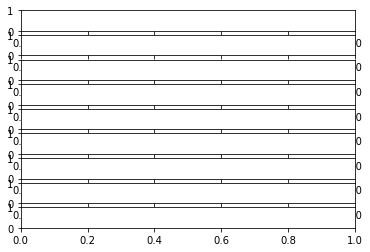

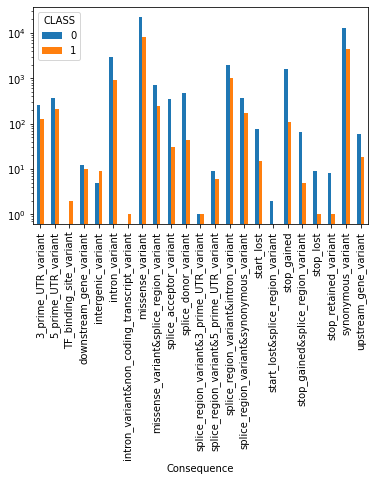

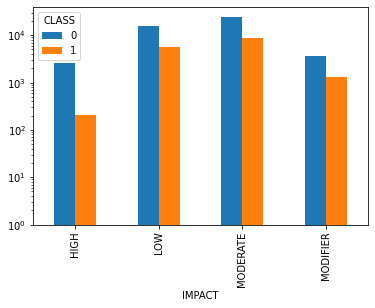

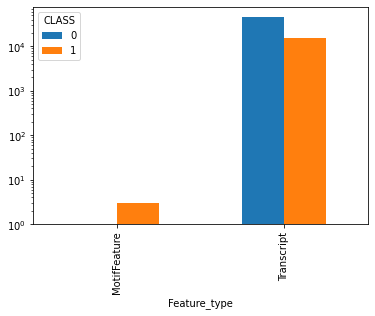

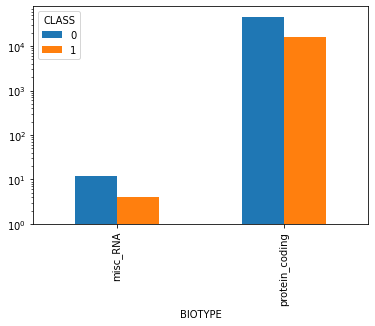

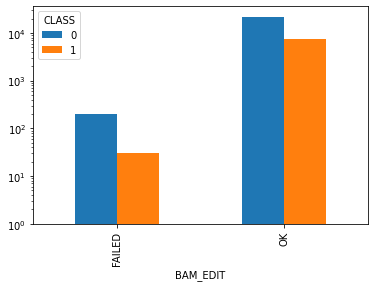

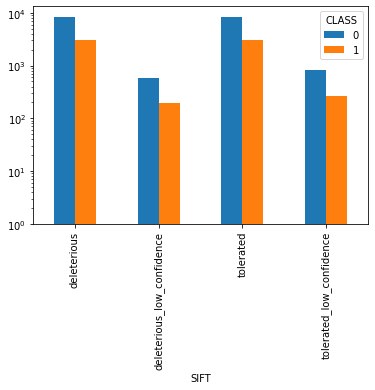

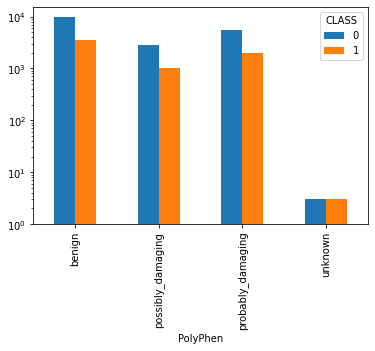

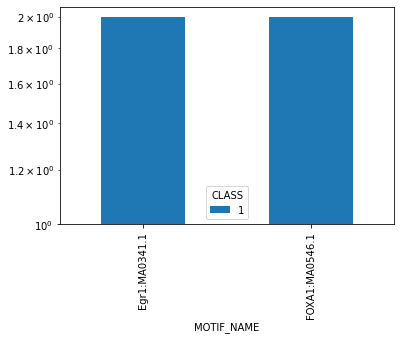

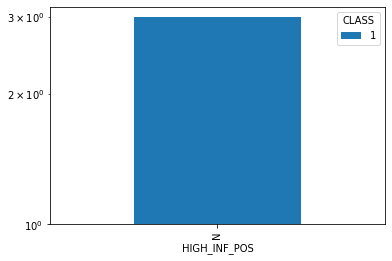

In [13]:
plt.subplots(len(categories_to_study))

    
def plot_categories(categorie):
    data[[categorie, "CLASS"]].groupby([categorie, "CLASS"]).size().unstack().plot(kind='bar', log=True).get_figure()
    
for categorie in categories_to_study:
    plot = plot_categories(categorie)

Vamos a eliminar las clases que no proveen información como HIGH_INF_POS o MOTIF_NAME para evitar que el modelo no se sobreajuste a variables innecesarias.

In [14]:
data = data.drop(columns =["Feature_type", "BIOTYPE", "BAM_EDIT", "MOTIF_NAME", "HIGH_INF_POS"])
data 

,CHROM,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNDISDB,CLNDISDBINCL,CLNDN,CLNDNINCL,CLNHGVS,CLNSIGINCL,CLNVC,CLNVI,MC,ORIGIN,SSR,CLASS,Consequence,IMPACT,SYMBOL,Feature,EXON,INTRON,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,DISTANCE,STRAND,SIFT,PolyPhen,MOTIF_POS,MOTIF_SCORE_CHANGE,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62
0,1,1168180,G,C,0.0771,0.10020,0.1066,MedGen:CN169374,NaN,not_specified,NaN,NC_000001.10:g.1168180G>C,NaN,single_nucleotide_variant,UniProtKB_(protein):Q96L58#VAR_059317,SO:0001583|missense_variant,1,NaN,0,missense_variant,MODERATE,B3GALT6,NM_080605.3,1/1,NaN,552,522,174,E/D,gaG/gaC,NaN,1.0,tolerated,benign,NaN,NaN,NaN,1.053,-0.208682,2.0
1,1,1470752,G,A,0.0000,0.00000,0.0000,"MedGen:C1843891,OMIM:607454,Orphanet:ORPHA9877...",NaN,Spinocerebellar_ataxia_21|not_provided,NaN,NC_000001.10:g.1470752G>A,NaN,single_nucleotide_variant,OMIM_Allelic_Variant:616101.0001|UniProtKB_(pr...,SO:0001583|missense_variant,1,NaN,0,missense_variant,MODERATE,TMEM240,NM_001114748.1,4/4,NaN,523,509,170,P/L,cCg/cTg,NaN,-1.0,deleterious_low_confidence,benign,NaN,NaN,NaN,31.000,6.517838,-3.0
2,1,1737942,A,G,0.0000,0.00001,0.0000,"Human_Phenotype_Ontology:HP:0000486,MedGen:C00...",NaN,Strabismus|Nystagmus|Hypothyroidism|Intellectu...,NaN,NC_000001.10:g.1737942A>G,NaN,single_nucleotide_variant,OMIM_Allelic_Variant:139380.0002|UniProtKB_(pr...,"SO:0001583|missense_variant,SO:0001623|5_prime...",35,NaN,1,missense_variant,MODERATE,GNB1,NM_002074.4,6/12,NaN,632,239,80,I/T,aTc/aCc,NaN,-1.0,deleterious,probably_damaging,NaN,NaN,NaN,28.100,6.061752,-1.0
3,1,2160305,G,A,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002...",NaN,Shprintzen-Goldberg_syndrome|not_provided,NaN,NC_000001.10:g.2160305G>A,NaN,single_nucleotide_variant,OMIM_Allelic_Variant:164780.0004|UniProtKB_(pr...,SO:0001583|missense_variant,33,NaN,0,missense_variant,MODERATE,SKI,XM_005244775.1,1/7,NaN,132,100,34,G/S,Ggc/Agc,NaN,1.0,NaN,NaN,NaN,NaN,NaN,22.500,3.114491,NaN
4,1,2160305,G,T,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002",NaN,Shprintzen-Goldberg_syndrome,NaN,NC_000001.10:g.2160305G>T,NaN,single_nucleotide_variant,OMIM_Allelic_Variant:164780.0005|UniProtKB_(pr...,SO:0001583|missense_variant,33,NaN,0,missense_variant,MODERATE,SKI,XM_005244775.1,1/7,NaN,132,100,34,G/C,Ggc/Tgc,NaN,1.0,NaN,NaN,NaN,NaN,NaN,24.700,4.766224,-3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65183,X,154158201,T,G,0.0801,0.13923,0.1605,"MedGen:C0019069,OMIM:306700,SNOMED_CT:28293008...",NaN,Hereditary_factor_VIII_deficiency_disease|not_...,NaN,NC_000023.10:g.154158201T>G,NaN,single_nucleotide_variant,"ARUP_Laboratories,_Molecular_Genetics_and_Geno...",SO:0001819|synonymous_variant,1,NaN,0,synonymous_variant,LOW,F8,NM_000132.3,14/26,NaN,4035,3864,1288,S,tcA/tcC,NaN,-1.0,NaN,NaN,NaN,NaN,0.00158,0.105,-0.630908,NaN
65184,X,154159118,C,T,0.0020,0.00060,0.0013,MedGen:CN169374|MedGen:CN239152,NaN,"not_specified|Hemophilia_A,_FVIII_Deficiency",NaN,NC_000023.10:g.154159118C>T,NaN,single_nucleotide_variant,"ARUP_Laboratories,_Molecular_Genetics_and_Geno...",SO:0001583|missense_variant,1,NaN,1,missense_variant,MODERATE,F8,NM_000132.3,14/26,NaN,3118,2947,983,V/I,Gta/Ata,NaN,-1.0,tolerated,benign,NaN,NaN,0.00158,0.002,-1.731470,3.0
65185,X,154194886,C,T,0.0125,0.00370,0.0111,MedGen:CN169374|MedGen:CN239152,NaN,"not_specified|Hemophilia_A,_FVIII_Deficiency",NaN,NC_000023.10:g.154194886C>T,NaN,single_nucleotide_variant,"ARUP_Laboratories,_Molecular_Genetics_and_Geno...",SO:0001819|synonymous_variant,1,NaN,0,synonymous_variant,LOW,F8,NM_000132.3,8/26,NaN,1257,1086,362,A,gcG/gcA,NaN,-1.0,NaN,NaN,NaN,NaN,0.00158,12.850,1.412434,NaN
65186,X,154490187,T,C,0.0003,0.00034,0.0000,"MedGen:C3501611,Orphanet:ORPHA777|MedGen:CN169374",NaN,Non-syndromic_X-linked_intellectual_disability...,NaN,NC_000023.10:g.154490187T>C,NaN,single_nucleotide_variant,"Ill

Vamos a observar las variables con el tag ClinVar

In [15]:
clinVar_categories = [ "CLNDISDB", "CLNDISDBINCL", "CLNDN", "CLNDNINCL", "CLNVC", "CLNVI", "CLNHGVS", "CLNSIGINCL"]
clinVar_data = data[clinVar_categories].join(data["CLASS"])
clinVar_data.groupby("CLASS").nunique()

,CLNDISDB,CLNDISDBINCL,CLNDN,CLNDNINCL,CLNVC,CLNVI,CLNHGVS,CLNSIGINCL
CLASS,,,,,,,,
0,6381,67,6387,71,1,17874,45578,83
1,4599,41,4611,43,1,8579,15703,58


Si realizamos una búsqueda vemos como las variables CLNDISDB y CLNDN están intrisecamente relacionadas (MedGen:C1843891 -> Spinocerebellar_ataxia_21); de la misma forma CLNDISDBINCL y CLNDNINCL

In [16]:
clinVar_data[["CLNDISDBINCL", "CLNDNINCL", "CLNDISDB", "CLNDN"]].dropna()

,CLNDISDBINCL,CLNDNINCL,CLNDISDB,CLNDN
134,"MedGen:C1828210,OMIM:153870,Orphanet:ORPHA2512...",Bull's_eye_maculopathy|Methylmalonic_acidemia_...,"MedGen:C1848561,OMIM:277400,Orphanet:ORPHA26|M...",Methylmalonic_acidemia_with_homocystinuria|not...
149,"MedGen:C3280160,OMIM:614212,Orphanet:ORPHA263524","Encephalopathy,_acute,_infection-induced,_4,_s...","MedGen:C0342790,Orphanet:ORPHA157,SNOMED_CT:23...",Carnitine_palmitoyltransferase_II_deficiency|C...
150,"MedGen:C3280160,OMIM:614212,Orphanet:ORPHA263524","Encephalopathy,_acute,_infection-induced,_4,_s...","MedGen:C0342790,Orphanet:ORPHA157,SNOMED_CT:23...",Carnitine_palmitoyltransferase_II_deficiency|n...
151,"MedGen:C0342790,Orphanet:ORPHA157,SNOMED_CT:23...",Carnitine_palmitoyltransferase_II_deficiency|C...,"MedGen:C0342790,Orphanet:ORPHA157,SNOMED_CT:23...",Carnitine_palmitoyltransferase_II_deficiency|n...
199,"MeSH:C535804,MedGen:C1855465,OMIM:248200",Stargardt_disease_1,"Human_Phenotype_Ontology:HP:0000548,MedGen:C07...",Cone/cone-rod_dystrophy|Macular_degeneration|S...
...,...,...,...,...
61526,"MedGen:C1832978,OMIM:600974","Deafness,_autosomal_recessive_7","MedGen:C1832978,OMIM:600974|MedGen:CN043648,Or...","Deafness,_autosomal_recessive_7|Nonsyndromic_h..."
62658,"MedGen:C0007959,Orphanet:ORPHA166,SNOMED_CT:50...",Charcot-Marie-Tooth_disease,MedGen:CN169374|MedGen:CN239175|MedGen:CN239198,"not_specified|Amyotrophic_Lateral_Sclerosis,_D..."
62672,"MedGen:C0007959,Orphanet:ORPHA166,SNOMED_CT:50...",Charcot-Marie-Tooth_disease,"MedGen:C1853761,OMIM:606002|MedGen:C1865409,OM...",Spinocerebellar_ataxia_autosomal_recessive_1|A...
65169,.,G6PD_SANTAMARIA,".|MedGen:C2720289,OMIM:300908,Orphanet:ORPHA46...","G6PD_MALAGA|Anemia,_nonspherocytic_hemolytic,_..."


In [17]:
data[~clinVar_data["CLNSIGINCL"].isna()]

,CHROM,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNDISDB,CLNDISDBINCL,CLNDN,CLNDNINCL,CLNHGVS,CLNSIGINCL,CLNVC,CLNVI,MC,ORIGIN,SSR,CLASS,Consequence,IMPACT,SYMBOL,Feature,EXON,INTRON,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,DISTANCE,STRAND,SIFT,PolyPhen,MOTIF_POS,MOTIF_SCORE_CHANGE,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62
134,1,45974520,G,A,0.0001,0.00015,0.0000,"MedGen:C1848561,OMIM:277400,Orphanet:ORPHA26|M...","MedGen:C1828210,OMIM:153870,Orphanet:ORPHA2512...",Methylmalonic_acidemia_with_homocystinuria|not...,Bull's_eye_maculopathy|Methylmalonic_acidemia_...,NC_000001.10:g.45974520G>A,424754:Likely_pathogenic,single_nucleotide_variant,"ARUP_Laboratories,_Molecular_Genetics_and_Geno...",SO:0001583|missense_variant,5,NaN,0,missense_variant,MODERATE,MMACHC,NM_015506.2,4/4,NaN,631,482,161,R/Q,cGa/cAa,NaN,1.0,deleterious,probably_damaging,NaN,NaN,0.3180,34.000,7.500151,1.0
149,1,53676401,T,G,0.0072,0.02184,0.0465,"MedGen:C0342790,Orphanet:ORPHA157,SNOMED_CT:23...","MedGen:C3280160,OMIM:614212,Orphanet:ORPHA263524",Carnitine_palmitoyltransferase_II_deficiency|C...,"Encephalopathy,_acute,_infection-induced,_4,_s...",NC_000001.10:g.53676401T>G,30118:risk_factor,single_nucleotide_variant,HGMD:CM065101|Illumina_Clinical_Services_Labor...,SO:0001583|missense_variant,1,NaN,0,missense_variant,MODERATE,CPT2,NM_000098.2,4/5,NaN,1570,1055,352,F/C,tTt/tGt,NaN,1.0,deleterious,probably_damaging,NaN,NaN,0.1310,24.400,4.574825,-2.0
150,1,53676448,G,A,0.4564,0.48413,0.4131,"MedGen:C0342790,Orphanet:ORPHA157,SNOMED_CT:23...","MedGen:C3280160,OMIM:614212,Orphanet:ORPHA263524",Carnitine_palmitoyltransferase_II_deficiency|n...,"Encephalopathy,_acute,_infection-induced,_4,_s...",NC_000001.10:g.53676448G>A,30118:risk_factor,single_nucleotide_variant,HGMD:CM139511|Illumina_Clinical_Services_Labor...,SO:0001583|missense_variant,1,NaN,0,missense_variant,MODERATE,CPT2,NM_000098.2,4/5,NaN,1617,1102,368,V/I,Gtc/Atc,NaN,1.0,tolerated,benign,NaN,NaN,0.1310,0.002,-1.831683,3.0
151,1,53676688,T,C,0.0000,0.00011,0.0000,"MedGen:C0342790,Orphanet:ORPHA157,SNOMED_CT:23...","MedGen:C0342790,Orphanet:ORPHA157,SNOMED_CT:23...",Carnitine_palmitoyltransferase_II_deficiency|n...,Carnitine_palmitoyltransferase_II_deficiency|C...,NC_000001.10:g.53676688T>C,60702:Pathogenic,single_nucleotide_variant,OMIM_Allelic_Variant:600650.0009|UniProtKB_(pr...,SO:0001583|missense_variant,1,NaN,1,missense_variant,MODERATE,CPT2,NM_000098.2,4/5,NaN,1857,1342,448,F/L,Ttt/Ctt,NaN,1.0,deleterious,probably_damaging,NaN,NaN,0.1310,26.200,5.501053,NaN
199,1,94467548,C,G,0.0037,0.00275,0.0028,"Human_Phenotype_Ontology:HP:0000548,MedGen:C07...","MeSH:C535804,MedGen:C1855465,OMIM:248200",Cone/cone-rod_dystrophy|Macular_degeneration|S...,Stargardt_disease_1,NC_000001.10:g.94467548C>G,236131:Likely_pathogenic,single_nucleotide_variant,HGMD:CM970020|Illumina_Clinical_Services_Labor...,SO:0001583|missense_variant,1,NaN,1,missense_variant&splice_region_variant,MODERATE,ABCA4,NM_000350.2,45/50,NaN,6252,6148,2050,V/L,Gtt/Ctt,NaN,-1.0,deleterious,possibly_damaging,NaN,NaN,0.0107,33.000,6.946676,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61526,9,75404174,C,T,0.0001,0.00002,0.0002,"MedGen:C1832978,OMIM:600974|MedGen:CN043648,Or...","MedGen:C1832978,OMIM:600974","Deafness,_autosomal_recessive_7|Nonsyndromic_h...","Deafness,_autosomal_recessive_7",NC_000009.11:g.75404174C>T,424813:Pathogenic,single_nucleotide_variant,NaN,SO:0001587|nonsense,1,NaN,0,stop_gained,HIGH,TMC1,NM_138691.2,15/24,NaN,1705,1165,389,R/*,Cga/Tga,NaN,1.0,NaN,NaN,NaN,NaN,0.8190,38.000,11.828830,NaN
62658,9,135203176,G,A,0.0005,0.00125,0.0008,MedGen:CN169374|MedGen:CN239175|MedGen:CN239198,"MedGen:C0007959,Orphanet:ORPHA166,SNOMED_CT:50...","not_specified|Amyotrophic_Lateral_Sclerosis,_D...",Charcot-Marie-Tooth_disease,NC_000009.11:g.135203176G>A,157525:Uncertain_significance,single_nucleotide_variant,"Ill

In [18]:
number_of_CLDNs = clinVar_data["CLNDN"].str.extractall(r"\|?(?P<clndn>\w*)").drop_duplicates().count()
number_of_CLNDNINCLs = clinVar_data["CLNDNINCL"].str.extractall(r"\|?(?P<clndn>\w*)").drop_duplicates().count()
number_of_CLDNs, number_of_CLNDNINCLs

(clndn    4733
 dtype: int64,
 clndn    181
 dtype: int64)

In [19]:
clinVar_data["CLNDN"].str.extractall(r"\|?(?P<clndn>\w*)").dropna().groupby(level=[0]).size().max()

47

In [20]:
clinVar_data["CLNSIGINCL"].dropna().count(), clinVar_data["CLNDN"].dropna().count(), clinVar_data["CLNDNINCL"].dropna().count()

(158, 61281, 158)

In [21]:
data["CLNDN"] = clinVar_data["CLNDN"].str.extractall(r"\|?(?P<clndn>\w*)").dropna().groupby(level=[0])["clndn"].apply(list)

De momento vamos a eliminar estas variables ya que tienen un número elevado de clases para los pocos casos que tienen. Excepto CLDND el resto van a ser eliminadas.

In [22]:
clinVar_categories.remove("CLNDN")
data = data.drop(columns = clinVar_categories)
data

,CHROM,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNDN,MC,ORIGIN,SSR,CLASS,Consequence,IMPACT,SYMBOL,Feature,EXON,INTRON,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,DISTANCE,STRAND,SIFT,PolyPhen,MOTIF_POS,MOTIF_SCORE_CHANGE,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62
0,1,1168180,G,C,0.0771,0.10020,0.1066,[not_specified],SO:0001583|missense_variant,1,NaN,0,missense_variant,MODERATE,B3GALT6,NM_080605.3,1/1,NaN,552,522,174,E/D,gaG/gaC,NaN,1.0,tolerated,benign,NaN,NaN,NaN,1.053,-0.208682,2.0
1,1,1470752,G,A,0.0000,0.00000,0.0000,"[Spinocerebellar_ataxia_21, not_provided]",SO:0001583|missense_variant,1,NaN,0,missense_variant,MODERATE,TMEM240,NM_001114748.1,4/4,NaN,523,509,170,P/L,cCg/cTg,NaN,-1.0,deleterious_low_confidence,benign,NaN,NaN,NaN,31.000,6.517838,-3.0
2,1,1737942,A,G,0.0000,0.00001,0.0000,"[Strabismus, Nystagmus, Hypothyroidism, Intell...","SO:0001583|missense_variant,SO:0001623|5_prime...",35,NaN,1,missense_variant,MODERATE,GNB1,NM_002074.4,6/12,NaN,632,239,80,I/T,aTc/aCc,NaN,-1.0,deleterious,probably_damaging,NaN,NaN,NaN,28.100,6.061752,-1.0
3,1,2160305,G,A,0.0000,0.00000,0.0000,"[Shprintzen, Goldberg_syndrome, not_provided]",SO:0001583|missense_variant,33,NaN,0,missense_variant,MODERATE,SKI,XM_005244775.1,1/7,NaN,132,100,34,G/S,Ggc/Agc,NaN,1.0,NaN,NaN,NaN,NaN,NaN,22.500,3.114491,NaN
4,1,2160305,G,T,0.0000,0.00000,0.0000,"[Shprintzen, Goldberg_syndrome]",SO:0001583|missense_variant,33,NaN,0,missense_variant,MODERATE,SKI,XM_005244775.1,1/7,NaN,132,100,34,G/C,Ggc/Tgc,NaN,1.0,NaN,NaN,NaN,NaN,NaN,24.700,4.766224,-3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65183,X,154158201,T,G,0.0801,0.13923,0.1605,"[Hereditary_factor_VIII_deficiency_disease, no...",SO:0001819|synonymous_variant,1,NaN,0,synonymous_variant,LOW,F8,NM_000132.3,14/26,NaN,4035,3864,1288,S,tcA/tcC,NaN,-1.0,NaN,NaN,NaN,NaN,0.00158,0.105,-0.630908,NaN
65184,X,154159118,C,T,0.0020,0.00060,0.0013,"[not_specified, Hemophilia_A, _FVIII_Deficiency]",SO:0001583|missense_variant,1,NaN,1,missense_variant,MODERATE,F8,NM_000132.3,14/26,NaN,3118,2947,983,V/I,Gta/Ata,NaN,-1.0,tolerated,benign,NaN,NaN,0.00158,0.002,-1.731470,3.0
65185,X,154194886,C,T,0.0125,0.00370,0.0111,"[not_specified, Hemophilia_A, _FVIII_Deficiency]",SO:0001819|synonymous_variant,1,NaN,0,synonymous_variant,LOW,F8,NM_000132.3,8/26,NaN,1257,1086,362,A,gcG/gcA,NaN,-1.0,NaN,NaN,NaN,NaN,0.00158,12.850,1.412434,NaN
65186,X,154490187,T,C,0.0003,0.00034,0.0000,"[Non, syndromic_X, linked_intellectual_disabil...",SO:0001819|synonymous_variant,1,NaN,0,synonymous_variant,LOW,RAB39B,NM_171998.2,2/2,NaN,822,543,181,T,acA/acG,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,0.130,-0.592415,NaN


Vamos a realizar el mismo procedimiento que MC

In [23]:
mc_transformed = data[["MC", "Consequence"]]
mc_transformed["MC"] = mc_transformed["MC"].str.extractall(r"\w+\|(?P<MC>\w+)").dropna().groupby(level=[0])["MC"].apply(list)
mc_transformed

<ipython-input-23-23eb3f6073a5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mc_transformed["MC"] = mc_transformed["MC"].str.extractall(r"\w+\|(?P<MC>\w+)").dropna().groupby(level=[0])["MC"].apply(list)


,MC,Consequence
0,[missense_variant],missense_variant
1,[missense_variant],missense_variant
2,"[missense_variant, 5_prime_UTR_variant]",missense_variant
3,[missense_variant],missense_variant
4,[missense_variant],missense_variant
...,...,...
65183,[synonymous_variant],synonymous_variant
65184,[missense_variant],missense_variant
65185,[synonymous_variant],synonymous_variant
65186,[synonymous_variant],synonymous_variant


In [24]:
mc_transformed["MC"] = mc_transformed["MC"].fillna("").apply(list)
mc_transformed[~mc_transformed.apply(lambda row : row["Consequence"] in row["MC"], axis=1)].head(25)

<ipython-input-24-9db43b4e46b4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mc_transformed["MC"] = mc_transformed["MC"].fillna("").apply(list)


,MC,Consequence
114,"[missense_variant, intron_variant]",missense_variant&splice_region_variant
119,[missense_variant],missense_variant&splice_region_variant
122,[missense_variant],missense_variant&splice_region_variant
147,[missense_variant],missense_variant&splice_region_variant
152,[missense_variant],missense_variant&splice_region_variant
199,[missense_variant],missense_variant&splice_region_variant
213,[missense_variant],missense_variant&splice_region_variant
234,[missense_variant],missense_variant&splice_region_variant
252,[missense_variant],missense_variant&splice_region_variant
303,[missense_variant],missense_variant&splice_region_variant


In [25]:
mc_transformed[~mc_transformed.apply(lambda row : row["Consequence"] in row["MC"], axis=1)]["Consequence"].unique()

array(['missense_variant&splice_region_variant', '3_prime_UTR_variant',
       'intron_variant', 'synonymous_variant', '5_prime_UTR_variant',
       'downstream_gene_variant', 'upstream_gene_variant',
       'splice_region_variant&synonymous_variant',
       'splice_region_variant&intron_variant', 'stop_lost', 'stop_gained',
       'stop_gained&splice_region_variant', 'start_lost',
       'missense_variant', 'splice_region_variant&5_prime_UTR_variant',
       'start_lost&splice_region_variant', 'stop_retained_variant',
       'splice_donor_variant',
       'splice_region_variant&3_prime_UTR_variant',
       'intron_variant&non_coding_transcript_variant',
       'TF_binding_site_variant', 'intergenic_variant'], dtype=object)

In [26]:
mc_transformed[mc_transformed.apply(lambda row : "&" in row["Consequence"] and row["Consequence"] not in row["MC"] , axis=1)]

,MC,Consequence
114,"[missense_variant, intron_variant]",missense_variant&splice_region_variant
119,[missense_variant],missense_variant&splice_region_variant
122,[missense_variant],missense_variant&splice_region_variant
147,[missense_variant],missense_variant&splice_region_variant
152,[missense_variant],missense_variant&splice_region_variant
...,...,...
65096,[intron_variant],splice_region_variant&intron_variant
65109,[intron_variant],splice_region_variant&intron_variant
65113,[intron_variant],splice_region_variant&intron_variant
65114,[intron_variant],splice_region_variant&intron_variant


Vamos a observar si la posición puede ser un atributo interesante y podríamos binarizarlo según cromosoma.

In [27]:
mc_transformed["Consequence"] = mc_transformed["Consequence"].str.split("&")
mc_transformed

<ipython-input-27-711f5bf1fc08>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mc_transformed["Consequence"] = mc_transformed["Consequence"].str.split("&")


,MC,Consequence
0,[missense_variant],[missense_variant]
1,[missense_variant],[missense_variant]
2,"[missense_variant, 5_prime_UTR_variant]",[missense_variant]
3,[missense_variant],[missense_variant]
4,[missense_variant],[missense_variant]
...,...,...
65183,[synonymous_variant],[synonymous_variant]
65184,[missense_variant],[missense_variant]
65185,[synonymous_variant],[synonymous_variant]
65186,[synonymous_variant],[synonymous_variant]


In [28]:
def transform_consequence(row):
    if(type(row["Consequence"]) == list and len(row["Consequence"]) > 1):
        return [x for x in row["Consequence"] if x not in row["MC"]]
    return row["Consequence"]
        
consequences = mc_transformed.apply(transform_consequence, axis=1)
mc_transformed[~consequences.apply(lambda x: x if len(x) > 1 else None ).isna()]

,MC,Consequence
6646,[nonsense],"[stop_gained, splice_region_variant]"
7410,[nonsense],"[stop_gained, splice_region_variant]"
8084,"[nonsense, intron_variant]","[stop_gained, splice_region_variant]"
9033,[nonsense],"[stop_gained, splice_region_variant]"
10445,[nonsense],"[stop_gained, splice_region_variant]"
...,...,...
63649,[nonsense],"[stop_gained, splice_region_variant]"
63803,[nonsense],"[stop_gained, splice_region_variant]"
64015,[nonsense],"[stop_gained, splice_region_variant]"
64071,[nonsense],"[stop_gained, splice_region_variant]"


Stop gained and splice_region_variant como una única clase

In [29]:
mc_transformed["Consequence"] = consequences.apply(lambda x: f'{x[0]}&{x[1]}' if len(x) > 1 else x[0])
mc_transformed

<ipython-input-29-743774c945b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mc_transformed["Consequence"] = consequences.apply(lambda x: f'{x[0]}&{x[1]}' if len(x) > 1 else x[0])


,MC,Consequence
0,[missense_variant],missense_variant
1,[missense_variant],missense_variant
2,"[missense_variant, 5_prime_UTR_variant]",missense_variant
3,[missense_variant],missense_variant
4,[missense_variant],missense_variant
...,...,...
65183,[synonymous_variant],synonymous_variant
65184,[missense_variant],missense_variant
65185,[synonymous_variant],synonymous_variant
65186,[synonymous_variant],synonymous_variant


In [30]:
def transform_mc(row):
    mc_list = [x for x in row["MC"] if x not in row["Consequence"]]
    return mc_list if len(mc_list) > 0 else []
        
mc_transformed["MC"] = mc_transformed.apply(transform_mc, axis=1)

<ipython-input-30-4302e4ebcc46>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mc_transformed["MC"] = mc_transformed.apply(transform_mc, axis=1)


In [31]:
mc_transformed["MC"].apply(lambda x : x if len(x) > 0 else None).dropna()

2                        [5_prime_UTR_variant]
22                       [5_prime_UTR_variant]
23       [5_prime_UTR_variant, intron_variant]
24       [5_prime_UTR_variant, intron_variant]
68                            [intron_variant]
                         ...                  
65136                               [nonsense]
65141                               [nonsense]
65150                         [intron_variant]
65157                         [intron_variant]
65177                    [3_prime_UTR_variant]
Name: MC, Length: 12684, dtype: object

In [32]:
mc_transformed["Consequence"].unique()

array(['missense_variant', 'splice_region_variant', 'intron_variant',
       '5_prime_UTR_variant', '3_prime_UTR_variant', 'synonymous_variant',
       'downstream_gene_variant', 'upstream_gene_variant', 'stop_lost',
       'stop_gained', 'stop_gained&splice_region_variant',
       'splice_acceptor_variant', 'splice_donor_variant', 'start_lost',
       'start_lost&splice_region_variant', 'stop_retained_variant',
       'intron_variant&non_coding_transcript_variant',
       'splice_region_variant&5_prime_UTR_variant',
       'splice_region_variant&synonymous_variant',
       'TF_binding_site_variant', 'intergenic_variant'], dtype=object)

Teniendo en cuenta que MC sólo tiene varias clases en sólo una sexta parte de los casos vamos a unir Consequence y MC

In [33]:
data["Consequence"] = mc_transformed.apply(lambda x : [x["Consequence"]] + x["MC"], axis=1)
data = data.drop(columns = ["MC"])
data

,CHROM,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNDN,ORIGIN,SSR,CLASS,Consequence,IMPACT,SYMBOL,Feature,EXON,INTRON,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,DISTANCE,STRAND,SIFT,PolyPhen,MOTIF_POS,MOTIF_SCORE_CHANGE,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62
0,1,1168180,G,C,0.0771,0.10020,0.1066,[not_specified],1,NaN,0,[missense_variant],MODERATE,B3GALT6,NM_080605.3,1/1,NaN,552,522,174,E/D,gaG/gaC,NaN,1.0,tolerated,benign,NaN,NaN,NaN,1.053,-0.208682,2.0
1,1,1470752,G,A,0.0000,0.00000,0.0000,"[Spinocerebellar_ataxia_21, not_provided]",1,NaN,0,[missense_variant],MODERATE,TMEM240,NM_001114748.1,4/4,NaN,523,509,170,P/L,cCg/cTg,NaN,-1.0,deleterious_low_confidence,benign,NaN,NaN,NaN,31.000,6.517838,-3.0
2,1,1737942,A,G,0.0000,0.00001,0.0000,"[Strabismus, Nystagmus, Hypothyroidism, Intell...",35,NaN,1,"[missense_variant, 5_prime_UTR_variant]",MODERATE,GNB1,NM_002074.4,6/12,NaN,632,239,80,I/T,aTc/aCc,NaN,-1.0,deleterious,probably_damaging,NaN,NaN,NaN,28.100,6.061752,-1.0
3,1,2160305,G,A,0.0000,0.00000,0.0000,"[Shprintzen, Goldberg_syndrome, not_provided]",33,NaN,0,[missense_variant],MODERATE,SKI,XM_005244775.1,1/7,NaN,132,100,34,G/S,Ggc/Agc,NaN,1.0,NaN,NaN,NaN,NaN,NaN,22.500,3.114491,NaN
4,1,2160305,G,T,0.0000,0.00000,0.0000,"[Shprintzen, Goldberg_syndrome]",33,NaN,0,[missense_variant],MODERATE,SKI,XM_005244775.1,1/7,NaN,132,100,34,G/C,Ggc/Tgc,NaN,1.0,NaN,NaN,NaN,NaN,NaN,24.700,4.766224,-3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65183,X,154158201,T,G,0.0801,0.13923,0.1605,"[Hereditary_factor_VIII_deficiency_disease, no...",1,NaN,0,[synonymous_variant],LOW,F8,NM_000132.3,14/26,NaN,4035,3864,1288,S,tcA/tcC,NaN,-1.0,NaN,NaN,NaN,NaN,0.00158,0.105,-0.630908,NaN
65184,X,154159118,C,T,0.0020,0.00060,0.0013,"[not_specified, Hemophilia_A, _FVIII_Deficiency]",1,NaN,1,[missense_variant],MODERATE,F8,NM_000132.3,14/26,NaN,3118,2947,983,V/I,Gta/Ata,NaN,-1.0,tolerated,benign,NaN,NaN,0.00158,0.002,-1.731470,3.0
65185,X,154194886,C,T,0.0125,0.00370,0.0111,"[not_specified, Hemophilia_A, _FVIII_Deficiency]",1,NaN,0,[synonymous_variant],LOW,F8,NM_000132.3,8/26,NaN,1257,1086,362,A,gcG/gcA,NaN,-1.0,NaN,NaN,NaN,NaN,0.00158,12.850,1.412434,NaN
65186,X,154490187,T,C,0.0003,0.00034,0.0000,"[Non, syndromic_X, linked_intellectual_disabil...",1,NaN,0,[synonymous_variant],LOW,RAB39B,NM_171998.2,2/2,NaN,822,543,181,T,acA/acG,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,0.130,-0.592415,NaN


Vamos a la distribución de los cromosomas

In [34]:
data["CHROM"].value_counts()

2     7723
17    4547
11    4323
1     4204
5     3426
16    3362
19    3245
7     2700
9     2593
12    2301
13    2292
10    2212
6     2034
X     1775
8     1762
14    1669
3     1508
15    1449
4     1159
22     977
3      895
18     733
21     681
20     655
2      479
17     476
19     398
16     341
12     303
14     219
15     168
13     131
11     126
21     119
18     111
22      92
20      77
MT      16
Name: CHROM, dtype: int64

<AxesSubplot:xlabel='bin'>

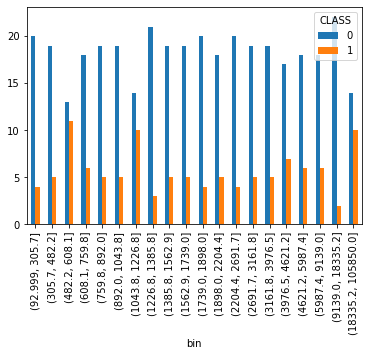

In [35]:
DNA_position = data[data["CHROM"] == "2"][["cDNA_position", "CLASS"]]
DNA_position["cDNA_position"] = pd.to_numeric(DNA_position["cDNA_position"])
DNA_position["bin"] = pd.qcut(DNA_position["cDNA_position"], 20)
DNA_position.groupby(["bin", "CLASS"]).size().unstack().plot(kind='bar')

<AxesSubplot:xlabel='bin'>

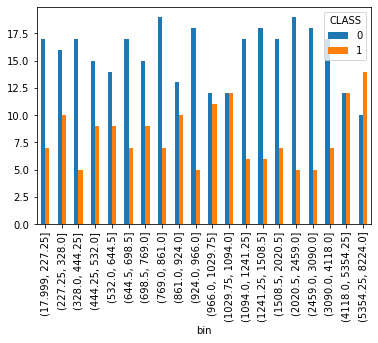

In [36]:
DNA_position = data[data["CHROM"] == "17"][["cDNA_position", "CLASS"]]
DNA_position["cDNA_position"] = pd.to_numeric(DNA_position["cDNA_position"])
DNA_position["bin"] = pd.qcut(DNA_position["cDNA_position"], 20)
DNA_position.groupby(["bin", "CLASS"]).size().unstack().plot(kind='bar')

Puede ser un atributo interesante, vamos a realizar la transformación por cada cromosoma. Pero antes vamos a ver cómo se correlacionan estas variables.

El valor puede estar entre dos valores, vamos a tomar el inferior y si está a ? el superior

<AxesSubplot:>

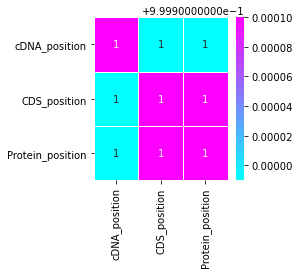

In [37]:
def get_value_position(position):
    if type(position) == str and len(position.split("-")) == 2:
        return position.split("-")[0] if position.split("-")[0] != "?" else position.split("-")[1]
    return position
position = data[["cDNA_position", "CDS_position", "Protein_position"]].copy()
position["cDNA_position"] =  position["cDNA_position"].apply(get_value_position)
position["cDNA_position"] =  pd.to_numeric(position["cDNA_position"])
position["CDS_position"] =  position["CDS_position"].apply(get_value_position)
position["CDS_position"] =  pd.to_numeric(position["CDS_position"])
position["Protein_position"] =  position["Protein_position"].apply(get_value_position)
position["Protein_position"] =  pd.to_numeric(position["Protein_position"])

plt.figure(figsize = (3, 3))
sns.heatmap(position.corr(), annot = True, linewidths=.5, cmap = plt.cm.cool)

In [38]:
position.std()

cDNA_position       13177.368887
CDS_position        13277.071786
Protein_position     4425.697072
dtype: float64

Eliminamos las variables correlacionadas cDNA_position y Protein_position

In [39]:
data = data.drop(columns = ["cDNA_position", "Protein_position"])
data

,CHROM,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNDN,ORIGIN,SSR,CLASS,Consequence,IMPACT,SYMBOL,Feature,EXON,INTRON,CDS_position,Amino_acids,Codons,DISTANCE,STRAND,SIFT,PolyPhen,MOTIF_POS,MOTIF_SCORE_CHANGE,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62
0,1,1168180,G,C,0.0771,0.10020,0.1066,[not_specified],1,NaN,0,[missense_variant],MODERATE,B3GALT6,NM_080605.3,1/1,NaN,522,E/D,gaG/gaC,NaN,1.0,tolerated,benign,NaN,NaN,NaN,1.053,-0.208682,2.0
1,1,1470752,G,A,0.0000,0.00000,0.0000,"[Spinocerebellar_ataxia_21, not_provided]",1,NaN,0,[missense_variant],MODERATE,TMEM240,NM_001114748.1,4/4,NaN,509,P/L,cCg/cTg,NaN,-1.0,deleterious_low_confidence,benign,NaN,NaN,NaN,31.000,6.517838,-3.0
2,1,1737942,A,G,0.0000,0.00001,0.0000,"[Strabismus, Nystagmus, Hypothyroidism, Intell...",35,NaN,1,"[missense_variant, 5_prime_UTR_variant]",MODERATE,GNB1,NM_002074.4,6/12,NaN,239,I/T,aTc/aCc,NaN,-1.0,deleterious,probably_damaging,NaN,NaN,NaN,28.100,6.061752,-1.0
3,1,2160305,G,A,0.0000,0.00000,0.0000,"[Shprintzen, Goldberg_syndrome, not_provided]",33,NaN,0,[missense_variant],MODERATE,SKI,XM_005244775.1,1/7,NaN,100,G/S,Ggc/Agc,NaN,1.0,NaN,NaN,NaN,NaN,NaN,22.500,3.114491,NaN
4,1,2160305,G,T,0.0000,0.00000,0.0000,"[Shprintzen, Goldberg_syndrome]",33,NaN,0,[missense_variant],MODERATE,SKI,XM_005244775.1,1/7,NaN,100,G/C,Ggc/Tgc,NaN,1.0,NaN,NaN,NaN,NaN,NaN,24.700,4.766224,-3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65183,X,154158201,T,G,0.0801,0.13923,0.1605,"[Hereditary_factor_VIII_deficiency_disease, no...",1,NaN,0,[synonymous_variant],LOW,F8,NM_000132.3,14/26,NaN,3864,S,tcA/tcC,NaN,-1.0,NaN,NaN,NaN,NaN,0.00158,0.105,-0.630908,NaN
65184,X,154159118,C,T,0.0020,0.00060,0.0013,"[not_specified, Hemophilia_A, _FVIII_Deficiency]",1,NaN,1,[missense_variant],MODERATE,F8,NM_000132.3,14/26,NaN,2947,V/I,Gta/Ata,NaN,-1.0,tolerated,benign,NaN,NaN,0.00158,0.002,-1.731470,3.0
65185,X,154194886,C,T,0.0125,0.00370,0.0111,"[not_specified, Hemophilia_A, _FVIII_Deficiency]",1,NaN,0,[synonymous_variant],LOW,F8,NM_000132.3,8/26,NaN,1086,A,gcG/gcA,NaN,-1.0,NaN,NaN,NaN,NaN,0.00158,12.850,1.412434,NaN
65186,X,154490187,T,C,0.0003,0.00034,0.0000,"[Non, syndromic_X, linked_intellectual_disabil...",1,NaN,0,[synonymous_variant],LOW,RAB39B,NM_171998.2,2/2,NaN,543,T,acA/acG,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,0.130,-0.592415,NaN


In [40]:
#data["CDS_position"] =  data["CDS_position"].apply(get_value_position)
#data["CDS_position"] = pd.to_numeric(data["CDS_position"])

#for chrom in data["CHROM"].unique():
#    selected_chrom = data[data["CHROM"] == chrom]
#    print(chrom)
#    pd.qcut(selected_chrom["CDS_position"], 20)


Hay un problema con los cromosomas mitocondrial

Como hay muy pocos casos de ADN mitocondrial, podríamos eliminarlo por el momento.

In [41]:
data[data["CHROM"] == "MT"]

,CHROM,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNDN,ORIGIN,SSR,CLASS,Consequence,IMPACT,SYMBOL,Feature,EXON,INTRON,CDS_position,Amino_acids,Codons,DISTANCE,STRAND,SIFT,PolyPhen,MOTIF_POS,MOTIF_SCORE_CHANGE,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62
63467,MT,961,T,G,0.0,0.0,0.0,"[Deafness, _nonsyndromic_sensorineural, _mitoc...",1,NaN,1,[TF_binding_site_variant],MODIFIER,NaN,MA0341.1,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,1.0,-0.063,NaN,10.720,1.010258,NaN
63468,MT,1291,T,C,0.0,0.0,0.0,"[Deafness, _nonsyndromic_sensorineural, _mitoc...",1,NaN,1,[intergenic_variant],MODIFIER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.752,0.847176,NaN
63469,MT,1393,G,A,0.0,0.0,0.0,"[not_specified, not_provided]",1,NaN,0,[intergenic_variant],MODIFIER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.300,0.938394,NaN
63470,MT,1462,G,A,0.0,0.0,0.0,"[not_specified, not_provided]",1,NaN,0,[intergenic_variant],MODIFIER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.440,0.961184,NaN
63471,MT,3243,A,G,0.0,0.0,0.0,"[Leigh_syndrome, Cyclical_vomiting_syndrome, J...",3,NaN,0,[intergenic_variant],MODIFIER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.093,0.740946,NaN
63472,MT,3308,T,C,0.0,0.0,0.0,"[SUDDEN_INFANT_DEATH_SYNDROME, Carcinoma_of_co...",0,NaN,1,[intergenic_variant],MODIFIER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.570,2.362247,NaN
63473,MT,4295,A,G,0.0,0.0,0.0,"[Primary_familial_hypertrophic_cardiomyopathy,...",1,NaN,1,[TF_binding_site_variant],MODIFIER,NaN,MA0546.1,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,-0.097,NaN,8.919,0.714091,NaN
63474,MT,4336,T,C,0.0,0.0,0.0,"[Sensorineural_deafness_and_migraine, not_prov...",1,NaN,1,[intergenic_variant],MODIFIER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.020,0.890800,NaN
63475,MT,5814,T,C,0.0,0.0,0.0,"[Juvenile_myopathy, _encephalopathy, _lactic_a...",1,NaN,1,[intergenic_variant],MODIFIER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.060,0.896723,NaN
63476,MT,8344,A,G,0.0,0.0,0.0,"[Leigh_syndrome, Myoclonus_with_epilepsy_with_...",1,NaN,1,[intergenic_variant],MODIFIER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.020,0.890492,NaN


Normalize positions for each chromosomes to avoid the differences in the location of chromosomes with longer positions.

In [42]:
data = data[data["CHROM"] != "MT"]

normalized_positions = []
data["CDS_position"] =  data["CDS_position"].apply(get_value_position)
data["CDS_position"] = pd.to_numeric(data["CDS_position"])

for chrom in data["CHROM"].unique():
    selected_chrom = data[data["CHROM"] == chrom]["CDS_position"]
    min_max = (selected_chrom-selected_chrom.min())/(selected_chrom.max()-selected_chrom.min())
    normalized_positions.append(min_max)

indexes = []
normalized = []

for positions_by_chrom in normalized_positions:
    indexes.extend(positions_by_chrom.index)
    normalized.extend(positions_by_chrom.array)

data["CDS_position"] = pd.Series(index=indexes, data=normalized)
data

<ipython-input-42-4ca5b9b7f568>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["CDS_position"] =  data["CDS_position"].apply(get_value_position)
<ipython-input-42-4ca5b9b7f568>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["CDS_position"] = pd.to_numeric(data["CDS_position"])
<ipython-input-42-4ca5b9b7f568>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

,CHROM,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNDN,ORIGIN,SSR,CLASS,Consequence,IMPACT,SYMBOL,Feature,EXON,INTRON,CDS_position,Amino_acids,Codons,DISTANCE,STRAND,SIFT,PolyPhen,MOTIF_POS,MOTIF_SCORE_CHANGE,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62
0,1,1168180,G,C,0.0771,0.10020,0.1066,[not_specified],1,NaN,0,[missense_variant],MODERATE,B3GALT6,NM_080605.3,1/1,NaN,0.033481,E/D,gaG/gaC,NaN,1.0,tolerated,benign,NaN,NaN,NaN,1.053,-0.208682,2.0
1,1,1470752,G,A,0.0000,0.00000,0.0000,"[Spinocerebellar_ataxia_21, not_provided]",1,NaN,0,[missense_variant],MODERATE,TMEM240,NM_001114748.1,4/4,NaN,0.032646,P/L,cCg/cTg,NaN,-1.0,deleterious_low_confidence,benign,NaN,NaN,NaN,31.000,6.517838,-3.0
2,1,1737942,A,G,0.0000,0.00001,0.0000,"[Strabismus, Nystagmus, Hypothyroidism, Intell...",35,NaN,1,"[missense_variant, 5_prime_UTR_variant]",MODERATE,GNB1,NM_002074.4,6/12,NaN,0.015295,I/T,aTc/aCc,NaN,-1.0,deleterious,probably_damaging,NaN,NaN,NaN,28.100,6.061752,-1.0
3,1,2160305,G,A,0.0000,0.00000,0.0000,"[Shprintzen, Goldberg_syndrome, not_provided]",33,NaN,0,[missense_variant],MODERATE,SKI,XM_005244775.1,1/7,NaN,0.006362,G/S,Ggc/Agc,NaN,1.0,NaN,NaN,NaN,NaN,NaN,22.500,3.114491,NaN
4,1,2160305,G,T,0.0000,0.00000,0.0000,"[Shprintzen, Goldberg_syndrome]",33,NaN,0,[missense_variant],MODERATE,SKI,XM_005244775.1,1/7,NaN,0.006362,G/C,Ggc/Tgc,NaN,1.0,NaN,NaN,NaN,NaN,NaN,24.700,4.766224,-3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65183,X,154158201,T,G,0.0801,0.13923,0.1605,"[Hereditary_factor_VIII_deficiency_disease, no...",1,NaN,0,[synonymous_variant],LOW,F8,NM_000132.3,14/26,NaN,0.354794,S,tcA/tcC,NaN,-1.0,NaN,NaN,NaN,NaN,0.00158,0.105,-0.630908,NaN
65184,X,154159118,C,T,0.0020,0.00060,0.0013,"[not_specified, Hemophilia_A, _FVIII_Deficiency]",1,NaN,1,[missense_variant],MODERATE,F8,NM_000132.3,14/26,NaN,0.270573,V/I,Gta/Ata,NaN,-1.0,tolerated,benign,NaN,NaN,0.00158,0.002,-1.731470,3.0
65185,X,154194886,C,T,0.0125,0.00370,0.0111,"[not_specified, Hemophilia_A, _FVIII_Deficiency]",1,NaN,0,[synonymous_variant],LOW,F8,NM_000132.3,8/26,NaN,0.099651,A,gcG/gcA,NaN,-1.0,NaN,NaN,NaN,NaN,0.00158,12.850,1.412434,NaN
65186,X,154490187,T,C,0.0003,0.00034,0.0000,"[Non, syndromic_X, linked_intellectual_disabil...",1,NaN,0,[synonymous_variant],LOW,RAB39B,NM_171998.2,2/2,NaN,0.049780,T,acA/acG,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,0.130,-0.592415,NaN


Vamos a partir la columna de aminoácidos y a eliminar la de codones ya que parte de la información está incluida en los aminoácidos.

In [43]:
def split_aminoacids(aminoacid_chain):
    aminoacids = aminoacid_chain.split("/")
    if(len(aminoacids) < 2):
        return [aminoacid_chain]
    return aminoacids
amino_acids_pairs = data["Amino_acids"].dropna().apply(split_aminoacids)

In [44]:
data["Amino_acids_target"] = amino_acids_pairs.transform(lambda x: x[1] if len(x) > 1 else '*') 
data["Amino_acids"] = amino_acids_pairs.transform(lambda x: x[0] if len(x) > 0 else '*') 
data

<ipython-input-44-6ad09db04180>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Amino_acids_target"] = amino_acids_pairs.transform(lambda x: x[1] if len(x) > 1 else '*')
<ipython-input-44-6ad09db04180>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Amino_acids"] = amino_acids_pairs.transform(lambda x: x[0] if len(x) > 0 else '*')


,CHROM,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNDN,ORIGIN,SSR,CLASS,Consequence,IMPACT,SYMBOL,Feature,EXON,INTRON,CDS_position,Amino_acids,Codons,DISTANCE,STRAND,SIFT,PolyPhen,MOTIF_POS,MOTIF_SCORE_CHANGE,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62,Amino_acids_target
0,1,1168180,G,C,0.0771,0.10020,0.1066,[not_specified],1,NaN,0,[missense_variant],MODERATE,B3GALT6,NM_080605.3,1/1,NaN,0.033481,E,gaG/gaC,NaN,1.0,tolerated,benign,NaN,NaN,NaN,1.053,-0.208682,2.0,D
1,1,1470752,G,A,0.0000,0.00000,0.0000,"[Spinocerebellar_ataxia_21, not_provided]",1,NaN,0,[missense_variant],MODERATE,TMEM240,NM_001114748.1,4/4,NaN,0.032646,P,cCg/cTg,NaN,-1.0,deleterious_low_confidence,benign,NaN,NaN,NaN,31.000,6.517838,-3.0,L
2,1,1737942,A,G,0.0000,0.00001,0.0000,"[Strabismus, Nystagmus, Hypothyroidism, Intell...",35,NaN,1,"[missense_variant, 5_prime_UTR_variant]",MODERATE,GNB1,NM_002074.4,6/12,NaN,0.015295,I,aTc/aCc,NaN,-1.0,deleterious,probably_damaging,NaN,NaN,NaN,28.100,6.061752,-1.0,T
3,1,2160305,G,A,0.0000,0.00000,0.0000,"[Shprintzen, Goldberg_syndrome, not_provided]",33,NaN,0,[missense_variant],MODERATE,SKI,XM_005244775.1,1/7,NaN,0.006362,G,Ggc/Agc,NaN,1.0,NaN,NaN,NaN,NaN,NaN,22.500,3.114491,NaN,S
4,1,2160305,G,T,0.0000,0.00000,0.0000,"[Shprintzen, Goldberg_syndrome]",33,NaN,0,[missense_variant],MODERATE,SKI,XM_005244775.1,1/7,NaN,0.006362,G,Ggc/Tgc,NaN,1.0,NaN,NaN,NaN,NaN,NaN,24.700,4.766224,-3.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65183,X,154158201,T,G,0.0801,0.13923,0.1605,"[Hereditary_factor_VIII_deficiency_disease, no...",1,NaN,0,[synonymous_variant],LOW,F8,NM_000132.3,14/26,NaN,0.354794,S,tcA/tcC,NaN,-1.0,NaN,NaN,NaN,NaN,0.00158,0.105,-0.630908,NaN,*
65184,X,154159118,C,T,0.0020,0.00060,0.0013,"[not_specified, Hemophilia_A, _FVIII_Deficiency]",1,NaN,1,[missense_variant],MODERATE,F8,NM_000132.3,14/26,NaN,0.270573,V,Gta/Ata,NaN,-1.0,tolerated,benign,NaN,NaN,0.00158,0.002,-1.731470,3.0,I
65185,X,154194886,C,T,0.0125,0.00370,0.0111,"[not_specified, Hemophilia_A, _FVIII_Deficiency]",1,NaN,0,[synonymous_variant],LOW,F8,NM_000132.3,8/26,NaN,0.099651,A,gcG/gcA,NaN,-1.0,NaN,NaN,NaN,NaN,0.00158,12.850,1.412434,NaN,*
65186,X,154490187,T,C,0.0003,0.00034,0.0000,"[Non, syndromic_X, linked_intellectual_disabil...",1,NaN,0,[synonymous_variant],LOW,RAB39B,NM_171998.2,2/2,NaN,0.049780,T,acA/acG,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,0.130,-0.592415,NaN,*


In [45]:
data = data.drop(columns = "Codons")
data

,CHROM,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNDN,ORIGIN,SSR,CLASS,Consequence,IMPACT,SYMBOL,Feature,EXON,INTRON,CDS_position,Amino_acids,DISTANCE,STRAND,SIFT,PolyPhen,MOTIF_POS,MOTIF_SCORE_CHANGE,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62,Amino_acids_target
0,1,1168180,G,C,0.0771,0.10020,0.1066,[not_specified],1,NaN,0,[missense_variant],MODERATE,B3GALT6,NM_080605.3,1/1,NaN,0.033481,E,NaN,1.0,tolerated,benign,NaN,NaN,NaN,1.053,-0.208682,2.0,D
1,1,1470752,G,A,0.0000,0.00000,0.0000,"[Spinocerebellar_ataxia_21, not_provided]",1,NaN,0,[missense_variant],MODERATE,TMEM240,NM_001114748.1,4/4,NaN,0.032646,P,NaN,-1.0,deleterious_low_confidence,benign,NaN,NaN,NaN,31.000,6.517838,-3.0,L
2,1,1737942,A,G,0.0000,0.00001,0.0000,"[Strabismus, Nystagmus, Hypothyroidism, Intell...",35,NaN,1,"[missense_variant, 5_prime_UTR_variant]",MODERATE,GNB1,NM_002074.4,6/12,NaN,0.015295,I,NaN,-1.0,deleterious,probably_damaging,NaN,NaN,NaN,28.100,6.061752,-1.0,T
3,1,2160305,G,A,0.0000,0.00000,0.0000,"[Shprintzen, Goldberg_syndrome, not_provided]",33,NaN,0,[missense_variant],MODERATE,SKI,XM_005244775.1,1/7,NaN,0.006362,G,NaN,1.0,NaN,NaN,NaN,NaN,NaN,22.500,3.114491,NaN,S
4,1,2160305,G,T,0.0000,0.00000,0.0000,"[Shprintzen, Goldberg_syndrome]",33,NaN,0,[missense_variant],MODERATE,SKI,XM_005244775.1,1/7,NaN,0.006362,G,NaN,1.0,NaN,NaN,NaN,NaN,NaN,24.700,4.766224,-3.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65183,X,154158201,T,G,0.0801,0.13923,0.1605,"[Hereditary_factor_VIII_deficiency_disease, no...",1,NaN,0,[synonymous_variant],LOW,F8,NM_000132.3,14/26,NaN,0.354794,S,NaN,-1.0,NaN,NaN,NaN,NaN,0.00158,0.105,-0.630908,NaN,*
65184,X,154159118,C,T,0.0020,0.00060,0.0013,"[not_specified, Hemophilia_A, _FVIII_Deficiency]",1,NaN,1,[missense_variant],MODERATE,F8,NM_000132.3,14/26,NaN,0.270573,V,NaN,-1.0,tolerated,benign,NaN,NaN,0.00158,0.002,-1.731470,3.0,I
65185,X,154194886,C,T,0.0125,0.00370,0.0111,"[not_specified, Hemophilia_A, _FVIII_Deficiency]",1,NaN,0,[synonymous_variant],LOW,F8,NM_000132.3,8/26,NaN,0.099651,A,NaN,-1.0,NaN,NaN,NaN,NaN,0.00158,12.850,1.412434,NaN,*
65186,X,154490187,T,C,0.0003,0.00034,0.0000,"[Non, syndromic_X, linked_intellectual_disabil...",1,NaN,0,[synonymous_variant],LOW,RAB39B,NM_171998.2,2/2,NaN,0.049780,T,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,0.130,-0.592415,NaN,*


Vamos a ver si el símbolo es una variable relevante.

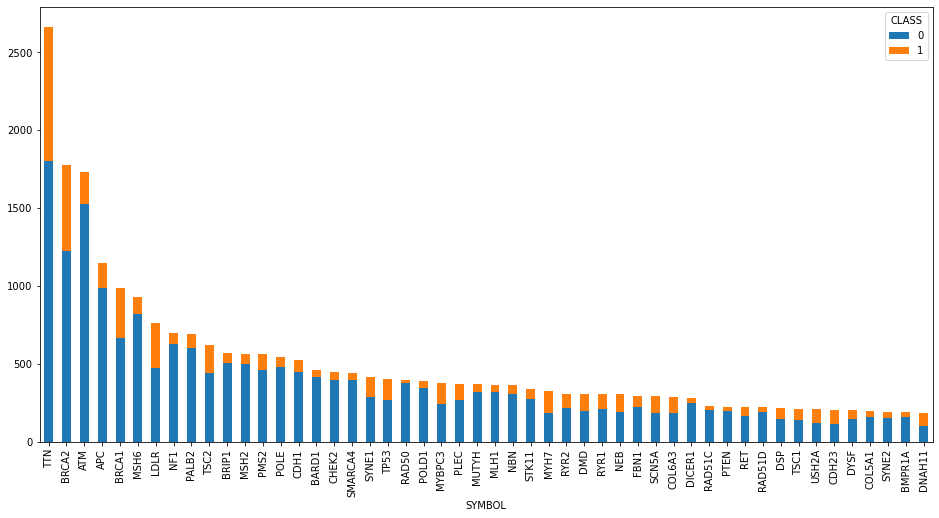

In [46]:
gene_ct = pd.crosstab(data.SYMBOL, data.CLASS, margins=True)
gene_ct.drop('All', axis=0, inplace=True)

gene_ct = gene_ct.sort_values(by='All', ascending=False).head(50)
gene_ct.drop('All', axis=1, inplace=True)

gene_ct.plot.bar(stacked=True, figsize=(16, 8));

Mismo comportamiento con la variable FEATURE

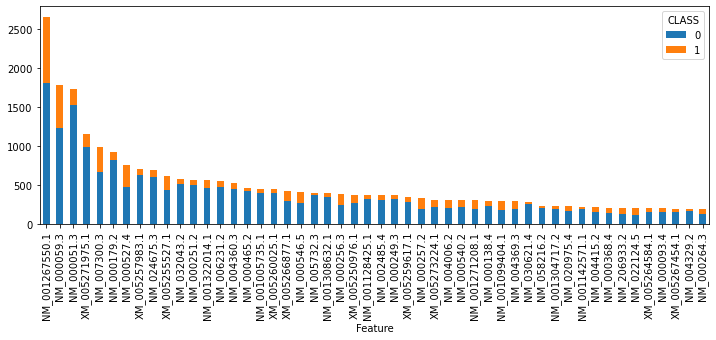

In [47]:
gene_ct = pd.crosstab(data.Feature, data.CLASS, margins=True)
gene_ct.drop('All', axis=0, inplace=True)

gene_ct = gene_ct.sort_values(by='All', ascending=False).head(50)
gene_ct.drop('All', axis=1, inplace=True)

gene_ct.plot.bar(stacked=True, figsize=(12, 4));

In [48]:
data.describe(include='all')

,CHROM,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNDN,ORIGIN,SSR,CLASS,Consequence,IMPACT,SYMBOL,Feature,EXON,INTRON,CDS_position,Amino_acids,DISTANCE,STRAND,SIFT,PolyPhen,MOTIF_POS,MOTIF_SCORE_CHANGE,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62,Amino_acids_target
count,61265.0,6.126500e+04,61265,61265,61265.000000,61265.000000,61265.000000,61265,61265.000000,127.000000,61265.000000,61265,61265,61265,61265,53347,7819,52366.000000,52366,99.000000,61265.000000,24772,24732,0.0,0.0,57343.000000,61265.000000,61265.000000,25514.000000,52366
unique,37.0,NaN,4,4,NaN,NaN,NaN,8713,NaN,NaN,NaN,172,4,2304,2340,3248,1847,NaN,21,NaN,NaN,4,4,NaN,NaN,NaN,NaN,NaN,NaN,21
top,2.0,NaN,C,T,NaN,NaN,NaN,[not_specified],NaN,NaN,NaN,[missense_variant],MODERATE,TTN,NM_001267550.1,16/16,47/362,NaN,R,NaN,NaN,deleterious,benign,NaN,NaN,NaN,NaN,NaN,NaN,*
freq,7723.0,NaN,21507,19778,NaN,NaN,NaN,5098,NaN,NaN,NaN,27384,32281,2658,2658,1056,91,NaN,7374,NaN,NaN,11466,13299,NaN,NaN,NaN,NaN,NaN,NaN,19981
mean,NaN,7.792918e+07,NaN,NaN,0.015253,0.015072,0.015967,NaN,1.327495,2.299213,0.256133,NaN,NaN,NaN,NaN,NaN,NaN,0.186576,NaN,863.616162,-0.006284,NaN,NaN,NaN,NaN,0.345379,15.496707,2.498877,-0.398487,NaN
std,NaN,5.997735e+07,NaN,NaN,0.059149,0.060622,0.060698,NaN,5.780055,4.235742,0.436500,NaN,NaN,NaN,NaN,NaN,NaN,0.207483,NaN,1103.931229,0.999988,NaN,NaN,NaN,NaN,0.361488,10.729685,2.918360,1.873196,NaN
min,NaN,1.387550e+05,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,1.000000,-1.000000,NaN,NaN,NaN,NaN,0.000069,0.001000,-5.477391,-3.000000,NaN
25%,NaN,3.261396e+07,NaN,NaN,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.039783,NaN,56.000000,-1.000000,NaN,NaN,NaN,NaN,0.023500,7.040000,0.450374,-2.000000,NaN
50%,NaN,5.814549e+07,NaN,NaN,0.000000,0.000060,0.000000,NaN,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.108135,NaN,495.000000,-1.000000,NaN,NaN,NaN,NaN,0.158000,13.920000,1.612233,-1.000000,NaN
75%,NaN,1.142750e+08,NaN,NaN,0.001500,0.001420,0.001800,NaN,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.253592,NaN,1574.000000,1.000000,NaN,NaN,NaN,NaN,0.713000,24.000000,4.273753,1.000000,NaN


Vemos como AF_ESP, AF_EXAC y AF_TGP tienen características muy similares, vamos  convertirlos en un valor ya que es la misma variable pero tomada de distintas fuentes, hemos optado por aplicar la mediana ya que la media puede verse muy afectada si hay una gran diferencia.

In [49]:
frecuencies_columns = ["AF_ESP", "AF_EXAC", "AF_TGP"]
frecuency = data[frecuencies_columns]
data["AF"] = frecuency.median(axis=1)
data

,CHROM,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNDN,ORIGIN,SSR,CLASS,Consequence,IMPACT,SYMBOL,Feature,EXON,INTRON,CDS_position,Amino_acids,DISTANCE,STRAND,SIFT,PolyPhen,MOTIF_POS,MOTIF_SCORE_CHANGE,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62,Amino_acids_target,AF
0,1,1168180,G,C,0.0771,0.10020,0.1066,[not_specified],1,NaN,0,[missense_variant],MODERATE,B3GALT6,NM_080605.3,1/1,NaN,0.033481,E,NaN,1.0,tolerated,benign,NaN,NaN,NaN,1.053,-0.208682,2.0,D,0.10020
1,1,1470752,G,A,0.0000,0.00000,0.0000,"[Spinocerebellar_ataxia_21, not_provided]",1,NaN,0,[missense_variant],MODERATE,TMEM240,NM_001114748.1,4/4,NaN,0.032646,P,NaN,-1.0,deleterious_low_confidence,benign,NaN,NaN,NaN,31.000,6.517838,-3.0,L,0.00000
2,1,1737942,A,G,0.0000,0.00001,0.0000,"[Strabismus, Nystagmus, Hypothyroidism, Intell...",35,NaN,1,"[missense_variant, 5_prime_UTR_variant]",MODERATE,GNB1,NM_002074.4,6/12,NaN,0.015295,I,NaN,-1.0,deleterious,probably_damaging,NaN,NaN,NaN,28.100,6.061752,-1.0,T,0.00000
3,1,2160305,G,A,0.0000,0.00000,0.0000,"[Shprintzen, Goldberg_syndrome, not_provided]",33,NaN,0,[missense_variant],MODERATE,SKI,XM_005244775.1,1/7,NaN,0.006362,G,NaN,1.0,NaN,NaN,NaN,NaN,NaN,22.500,3.114491,NaN,S,0.00000
4,1,2160305,G,T,0.0000,0.00000,0.0000,"[Shprintzen, Goldberg_syndrome]",33,NaN,0,[missense_variant],MODERATE,SKI,XM_005244775.1,1/7,NaN,0.006362,G,NaN,1.0,NaN,NaN,NaN,NaN,NaN,24.700,4.766224,-3.0,C,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65183,X,154158201,T,G,0.0801,0.13923,0.1605,"[Hereditary_factor_VIII_deficiency_disease, no...",1,NaN,0,[synonymous_variant],LOW,F8,NM_000132.3,14/26,NaN,0.354794,S,NaN,-1.0,NaN,NaN,NaN,NaN,0.00158,0.105,-0.630908,NaN,*,0.13923
65184,X,154159118,C,T,0.0020,0.00060,0.0013,"[not_specified, Hemophilia_A, _FVIII_Deficiency]",1,NaN,1,[missense_variant],MODERATE,F8,NM_000132.3,14/26,NaN,0.270573,V,NaN,-1.0,tolerated,benign,NaN,NaN,0.00158,0.002,-1.731470,3.0,I,0.00130
65185,X,154194886,C,T,0.0125,0.00370,0.0111,"[not_specified, Hemophilia_A, _FVIII_Deficiency]",1,NaN,0,[synonymous_variant],LOW,F8,NM_000132.3,8/26,NaN,0.099651,A,NaN,-1.0,NaN,NaN,NaN,NaN,0.00158,12.850,1.412434,NaN,*,0.01110
65186,X,154490187,T,C,0.0003,0.00034,0.0000,"[Non, syndromic_X, linked_intellectual_disabil...",1,NaN,0,[synonymous_variant],LOW,RAB39B,NM_171998.2,2/2,NaN,0.049780,T,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,0.130,-0.592415,NaN,*,0.00030


In [50]:
data = data.drop(columns = frecuencies_columns)
data

,CHROM,POS,REF,ALT,CLNDN,ORIGIN,SSR,CLASS,Consequence,IMPACT,SYMBOL,Feature,EXON,INTRON,CDS_position,Amino_acids,DISTANCE,STRAND,SIFT,PolyPhen,MOTIF_POS,MOTIF_SCORE_CHANGE,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62,Amino_acids_target,AF
0,1,1168180,G,C,[not_specified],1,NaN,0,[missense_variant],MODERATE,B3GALT6,NM_080605.3,1/1,NaN,0.033481,E,NaN,1.0,tolerated,benign,NaN,NaN,NaN,1.053,-0.208682,2.0,D,0.10020
1,1,1470752,G,A,"[Spinocerebellar_ataxia_21, not_provided]",1,NaN,0,[missense_variant],MODERATE,TMEM240,NM_001114748.1,4/4,NaN,0.032646,P,NaN,-1.0,deleterious_low_confidence,benign,NaN,NaN,NaN,31.000,6.517838,-3.0,L,0.00000
2,1,1737942,A,G,"[Strabismus, Nystagmus, Hypothyroidism, Intell...",35,NaN,1,"[missense_variant, 5_prime_UTR_variant]",MODERATE,GNB1,NM_002074.4,6/12,NaN,0.015295,I,NaN,-1.0,deleterious,probably_damaging,NaN,NaN,NaN,28.100,6.061752,-1.0,T,0.00000
3,1,2160305,G,A,"[Shprintzen, Goldberg_syndrome, not_provided]",33,NaN,0,[missense_variant],MODERATE,SKI,XM_005244775.1,1/7,NaN,0.006362,G,NaN,1.0,NaN,NaN,NaN,NaN,NaN,22.500,3.114491,NaN,S,0.00000
4,1,2160305,G,T,"[Shprintzen, Goldberg_syndrome]",33,NaN,0,[missense_variant],MODERATE,SKI,XM_005244775.1,1/7,NaN,0.006362,G,NaN,1.0,NaN,NaN,NaN,NaN,NaN,24.700,4.766224,-3.0,C,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65183,X,154158201,T,G,"[Hereditary_factor_VIII_deficiency_disease, no...",1,NaN,0,[synonymous_variant],LOW,F8,NM_000132.3,14/26,NaN,0.354794,S,NaN,-1.0,NaN,NaN,NaN,NaN,0.00158,0.105,-0.630908,NaN,*,0.13923
65184,X,154159118,C,T,"[not_specified, Hemophilia_A, _FVIII_Deficiency]",1,NaN,1,[missense_variant],MODERATE,F8,NM_000132.3,14/26,NaN,0.270573,V,NaN,-1.0,tolerated,benign,NaN,NaN,0.00158,0.002,-1.731470,3.0,I,0.00130
65185,X,154194886,C,T,"[not_specified, Hemophilia_A, _FVIII_Deficiency]",1,NaN,0,[synonymous_variant],LOW,F8,NM_000132.3,8/26,NaN,0.099651,A,NaN,-1.0,NaN,NaN,NaN,NaN,0.00158,12.850,1.412434,NaN,*,0.01110
65186,X,154490187,T,C,"[Non, syndromic_X, linked_intellectual_disabil...",1,NaN,0,[synonymous_variant],LOW,RAB39B,NM_171998.2,2/2,NaN,0.049780,T,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,0.130,-0.592415,NaN,*,0.00030


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61265 entries, 0 to 65187
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CHROM               61265 non-null  object 
 1   POS                 61265 non-null  int64  
 2   REF                 61265 non-null  object 
 3   ALT                 61265 non-null  object 
 4   CLNDN               61265 non-null  object 
 5   ORIGIN              61265 non-null  int64  
 6   SSR                 127 non-null    float64
 7   CLASS               61265 non-null  int64  
 8   Consequence         61265 non-null  object 
 9   IMPACT              61265 non-null  object 
 10  SYMBOL              61265 non-null  object 
 11  Feature             61265 non-null  object 
 12  EXON                53347 non-null  object 
 13  INTRON              7819 non-null   object 
 14  CDS_position        52366 non-null  float64
 15  Amino_acids         52366 non-null  object 
 16  DIST

Vemos como tenemos un número importante de variables que en la mayoría de casos son nulos, vamos a eliminar estas variables siempre y cuando no superen un límite.

In [52]:
percentage_na = data.isnull().sum().apply(lambda x: x/data.shape[0]*100)
percentage_na

CHROM                   0.000000
POS                     0.000000
REF                     0.000000
ALT                     0.000000
CLNDN                   0.000000
ORIGIN                  0.000000
SSR                    99.792704
CLASS                   0.000000
Consequence             0.000000
IMPACT                  0.000000
SYMBOL                  0.000000
Feature                 0.000000
EXON                   12.924182
INTRON                 87.237411
CDS_position           14.525422
Amino_acids            14.525422
DISTANCE               99.838407
STRAND                  0.000000
SIFT                   59.565821
PolyPhen               59.631111
MOTIF_POS             100.000000
MOTIF_SCORE_CHANGE    100.000000
LoFtool                 6.401698
CADD_PHRED              0.000000
CADD_RAW                0.000000
BLOSUM62               58.354689
Amino_acids_target     14.525422
AF                      0.000000
dtype: float64

In [53]:
applied_na = percentage_na[percentage_na > 75]
columns_to_delete = applied_na.index.to_numpy()
columns_to_delete

array(['SSR', 'INTRON', 'DISTANCE', 'MOTIF_POS', 'MOTIF_SCORE_CHANGE'],
      dtype=object)

Vamos a quitar el Intron porque posiblemente tenga relación con el EXON

In [54]:
columns_to_delete = columns_to_delete[columns_to_delete != "INTRON"] 
columns_to_delete

array(['SSR', 'DISTANCE', 'MOTIF_POS', 'MOTIF_SCORE_CHANGE'], dtype=object)

In [55]:
data = data.drop(columns=columns_to_delete)
data

,CHROM,POS,REF,ALT,CLNDN,ORIGIN,CLASS,Consequence,IMPACT,SYMBOL,Feature,EXON,INTRON,CDS_position,Amino_acids,STRAND,SIFT,PolyPhen,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62,Amino_acids_target,AF
0,1,1168180,G,C,[not_specified],1,0,[missense_variant],MODERATE,B3GALT6,NM_080605.3,1/1,NaN,0.033481,E,1.0,tolerated,benign,NaN,1.053,-0.208682,2.0,D,0.10020
1,1,1470752,G,A,"[Spinocerebellar_ataxia_21, not_provided]",1,0,[missense_variant],MODERATE,TMEM240,NM_001114748.1,4/4,NaN,0.032646,P,-1.0,deleterious_low_confidence,benign,NaN,31.000,6.517838,-3.0,L,0.00000
2,1,1737942,A,G,"[Strabismus, Nystagmus, Hypothyroidism, Intell...",35,1,"[missense_variant, 5_prime_UTR_variant]",MODERATE,GNB1,NM_002074.4,6/12,NaN,0.015295,I,-1.0,deleterious,probably_damaging,NaN,28.100,6.061752,-1.0,T,0.00000
3,1,2160305,G,A,"[Shprintzen, Goldberg_syndrome, not_provided]",33,0,[missense_variant],MODERATE,SKI,XM_005244775.1,1/7,NaN,0.006362,G,1.0,NaN,NaN,NaN,22.500,3.114491,NaN,S,0.00000
4,1,2160305,G,T,"[Shprintzen, Goldberg_syndrome]",33,0,[missense_variant],MODERATE,SKI,XM_005244775.1,1/7,NaN,0.006362,G,1.0,NaN,NaN,NaN,24.700,4.766224,-3.0,C,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65183,X,154158201,T,G,"[Hereditary_factor_VIII_deficiency_disease, no...",1,0,[synonymous_variant],LOW,F8,NM_000132.3,14/26,NaN,0.354794,S,-1.0,NaN,NaN,0.00158,0.105,-0.630908,NaN,*,0.13923
65184,X,154159118,C,T,"[not_specified, Hemophilia_A, _FVIII_Deficiency]",1,1,[missense_variant],MODERATE,F8,NM_000132.3,14/26,NaN,0.270573,V,-1.0,tolerated,benign,0.00158,0.002,-1.731470,3.0,I,0.00130
65185,X,154194886,C,T,"[not_specified, Hemophilia_A, _FVIII_Deficiency]",1,0,[synonymous_variant],LOW,F8,NM_000132.3,8/26,NaN,0.099651,A,-1.0,NaN,NaN,0.00158,12.850,1.412434,NaN,*,0.01110
65186,X,154490187,T,C,"[Non, syndromic_X, linked_intellectual_disabil...",1,0,[synonymous_variant],LOW,RAB39B,NM_171998.2,2/2,NaN,0.049780,T,-1.0,NaN,NaN,NaN,0.130,-0.592415,NaN,*,0.00030


PolyPhen ya tiene una clase unknown que podemos emplear para el resto de elementos que faltan

In [56]:
data["PolyPhen"] = data["PolyPhen"].fillna("unknown")
data["PolyPhen"].unique()

array(['benign', 'probably_damaging', 'unknown', 'possibly_damaging'],
      dtype=object)

Para los intrones y exones vamos a suponer una localización en el intron

In [57]:
data["EXON"].unique(), data["INTRON"].unique()

(array(['1/1', '4/4', '6/12', ..., '38/45', '39/45', '30/53'], dtype=object),
 array([nan, '6/27', '8/17', ..., '26/47', '12/47', '2/47'], dtype=object))

In [58]:
data[data["INTRON"].notna() & data["EXON"].notna()]

,CHROM,POS,REF,ALT,CLNDN,ORIGIN,CLASS,Consequence,IMPACT,SYMBOL,Feature,EXON,INTRON,CDS_position,Amino_acids,STRAND,SIFT,PolyPhen,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62,Amino_acids_target,AF


In [59]:
data[data["INTRON"].isna() & data["EXON"].isna()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 5227 to 64358
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CHROM               99 non-null     object 
 1   POS                 99 non-null     int64  
 2   REF                 99 non-null     object 
 3   ALT                 99 non-null     object 
 4   CLNDN               99 non-null     object 
 5   ORIGIN              99 non-null     int64  
 6   CLASS               99 non-null     int64  
 7   Consequence         99 non-null     object 
 8   IMPACT              99 non-null     object 
 9   SYMBOL              99 non-null     object 
 10  Feature             99 non-null     object 
 11  EXON                0 non-null      object 
 12  INTRON              0 non-null      object 
 13  CDS_position        0 non-null      float64
 14  Amino_acids         0 non-null      object 
 15  STRAND              99 non-null     float64
 16  SIFT

In [60]:
incoherent_indexes = data["INTRON"].isna() & data["EXON"].isna()
data = data[~incoherent_indexes]
data

,CHROM,POS,REF,ALT,CLNDN,ORIGIN,CLASS,Consequence,IMPACT,SYMBOL,Feature,EXON,INTRON,CDS_position,Amino_acids,STRAND,SIFT,PolyPhen,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62,Amino_acids_target,AF
0,1,1168180,G,C,[not_specified],1,0,[missense_variant],MODERATE,B3GALT6,NM_080605.3,1/1,NaN,0.033481,E,1.0,tolerated,benign,NaN,1.053,-0.208682,2.0,D,0.10020
1,1,1470752,G,A,"[Spinocerebellar_ataxia_21, not_provided]",1,0,[missense_variant],MODERATE,TMEM240,NM_001114748.1,4/4,NaN,0.032646,P,-1.0,deleterious_low_confidence,benign,NaN,31.000,6.517838,-3.0,L,0.00000
2,1,1737942,A,G,"[Strabismus, Nystagmus, Hypothyroidism, Intell...",35,1,"[missense_variant, 5_prime_UTR_variant]",MODERATE,GNB1,NM_002074.4,6/12,NaN,0.015295,I,-1.0,deleterious,probably_damaging,NaN,28.100,6.061752,-1.0,T,0.00000
3,1,2160305,G,A,"[Shprintzen, Goldberg_syndrome, not_provided]",33,0,[missense_variant],MODERATE,SKI,XM_005244775.1,1/7,NaN,0.006362,G,1.0,NaN,unknown,NaN,22.500,3.114491,NaN,S,0.00000
4,1,2160305,G,T,"[Shprintzen, Goldberg_syndrome]",33,0,[missense_variant],MODERATE,SKI,XM_005244775.1,1/7,NaN,0.006362,G,1.0,NaN,unknown,NaN,24.700,4.766224,-3.0,C,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65183,X,154158201,T,G,"[Hereditary_factor_VIII_deficiency_disease, no...",1,0,[synonymous_variant],LOW,F8,NM_000132.3,14/26,NaN,0.354794,S,-1.0,NaN,unknown,0.00158,0.105,-0.630908,NaN,*,0.13923
65184,X,154159118,C,T,"[not_specified, Hemophilia_A, _FVIII_Deficiency]",1,1,[missense_variant],MODERATE,F8,NM_000132.3,14/26,NaN,0.270573,V,-1.0,tolerated,benign,0.00158,0.002,-1.731470,3.0,I,0.00130
65185,X,154194886,C,T,"[not_specified, Hemophilia_A, _FVIII_Deficiency]",1,0,[synonymous_variant],LOW,F8,NM_000132.3,8/26,NaN,0.099651,A,-1.0,NaN,unknown,0.00158,12.850,1.412434,NaN,*,0.01110
65186,X,154490187,T,C,"[Non, syndromic_X, linked_intellectual_disabil...",1,0,[synonymous_variant],LOW,RAB39B,NM_171998.2,2/2,NaN,0.049780,T,-1.0,NaN,unknown,NaN,0.130,-0.592415,NaN,*,0.00030


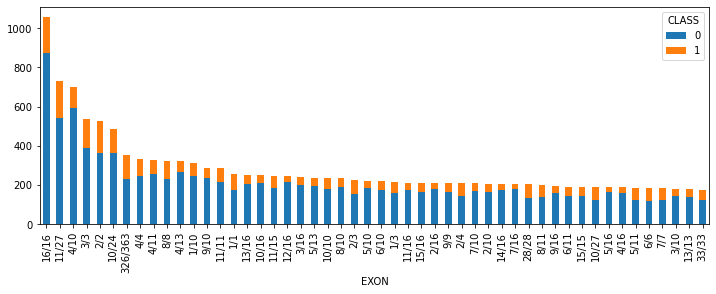

In [61]:
gene_ct = pd.crosstab(data.EXON, data.CLASS, margins=True)
gene_ct.drop('All', axis=0, inplace=True)

gene_ct = gene_ct.sort_values(by='All', ascending=False).head(50)
gene_ct.drop('All', axis=1, inplace=True)

gene_ct.plot.bar(stacked=True, figsize=(12, 4));

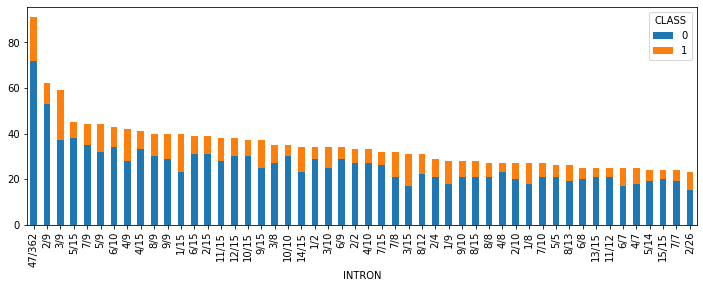

In [62]:
gene_ct = pd.crosstab(data.INTRON, data.CLASS, margins=True)
gene_ct.drop('All', axis=0, inplace=True)

gene_ct = gene_ct.sort_values(by='All', ascending=False).head(50)
gene_ct.drop('All', axis=1, inplace=True)

gene_ct.plot.bar(stacked=True, figsize=(12, 4));

Vamos a marcar la localización como una fracción y a unir ambas columnas

In [63]:
def intro_exon_to_float(value):
    if type(value) == str:
        values = value.split("/")
        return float(values[0])/float(values[1])
    return value

data["IS_EXON"] = ~data["EXON"].isna()
data["EXON"] = data["EXON"].transform(intro_exon_to_float)
data["INTRON"] = data["INTRON"].transform(intro_exon_to_float)
data["EXON_INTRON"] = data["EXON"].fillna(0)+data["INTRON"].fillna(0)

data = data.drop(columns = ["EXON", "INTRON"])
data

<ipython-input-63-836309a798ee>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["IS_EXON"] = ~data["EXON"].isna()
<ipython-input-63-836309a798ee>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["EXON"] = data["EXON"].transform(intro_exon_to_float)
<ipython-input-63-836309a798ee>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

,CHROM,POS,REF,ALT,CLNDN,ORIGIN,CLASS,Consequence,IMPACT,SYMBOL,Feature,CDS_position,Amino_acids,STRAND,SIFT,PolyPhen,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62,Amino_acids_target,AF,IS_EXON,EXON_INTRON
0,1,1168180,G,C,[not_specified],1,0,[missense_variant],MODERATE,B3GALT6,NM_080605.3,0.033481,E,1.0,tolerated,benign,NaN,1.053,-0.208682,2.0,D,0.10020,True,1.000000
1,1,1470752,G,A,"[Spinocerebellar_ataxia_21, not_provided]",1,0,[missense_variant],MODERATE,TMEM240,NM_001114748.1,0.032646,P,-1.0,deleterious_low_confidence,benign,NaN,31.000,6.517838,-3.0,L,0.00000,True,1.000000
2,1,1737942,A,G,"[Strabismus, Nystagmus, Hypothyroidism, Intell...",35,1,"[missense_variant, 5_prime_UTR_variant]",MODERATE,GNB1,NM_002074.4,0.015295,I,-1.0,deleterious,probably_damaging,NaN,28.100,6.061752,-1.0,T,0.00000,True,0.500000
3,1,2160305,G,A,"[Shprintzen, Goldberg_syndrome, not_provided]",33,0,[missense_variant],MODERATE,SKI,XM_005244775.1,0.006362,G,1.0,NaN,unknown,NaN,22.500,3.114491,NaN,S,0.00000,True,0.142857
4,1,2160305,G,T,"[Shprintzen, Goldberg_syndrome]",33,0,[missense_variant],MODERATE,SKI,XM_005244775.1,0.006362,G,1.0,NaN,unknown,NaN,24.700,4.766224,-3.0,C,0.00000,True,0.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65183,X,154158201,T,G,"[Hereditary_factor_VIII_deficiency_disease, no...",1,0,[synonymous_variant],LOW,F8,NM_000132.3,0.354794,S,-1.0,NaN,unknown,0.00158,0.105,-0.630908,NaN,*,0.13923,True,0.538462
65184,X,154159118,C,T,"[not_specified, Hemophilia_A, _FVIII_Deficiency]",1,1,[missense_variant],MODERATE,F8,NM_000132.3,0.270573,V,-1.0,tolerated,benign,0.00158,0.002,-1.731470,3.0,I,0.00130,True,0.538462
65185,X,154194886,C,T,"[not_specified, Hemophilia_A, _FVIII_Deficiency]",1,0,[synonymous_variant],LOW,F8,NM_000132.3,0.099651,A,-1.0,NaN,unknown,0.00158,12.850,1.412434,NaN,*,0.01110,True,0.307692
65186,X,154490187,T,C,"[Non, syndromic_X, linked_intellectual_disabil...",1,0,[synonymous_variant],LOW,RAB39B,NM_171998.2,0.049780,T,-1.0,NaN,unknown,NaN,0.130,-0.592415,NaN,*,0.00030,True,1.000000


Vamos a observar las correlaciones en el código

<AxesSubplot:>

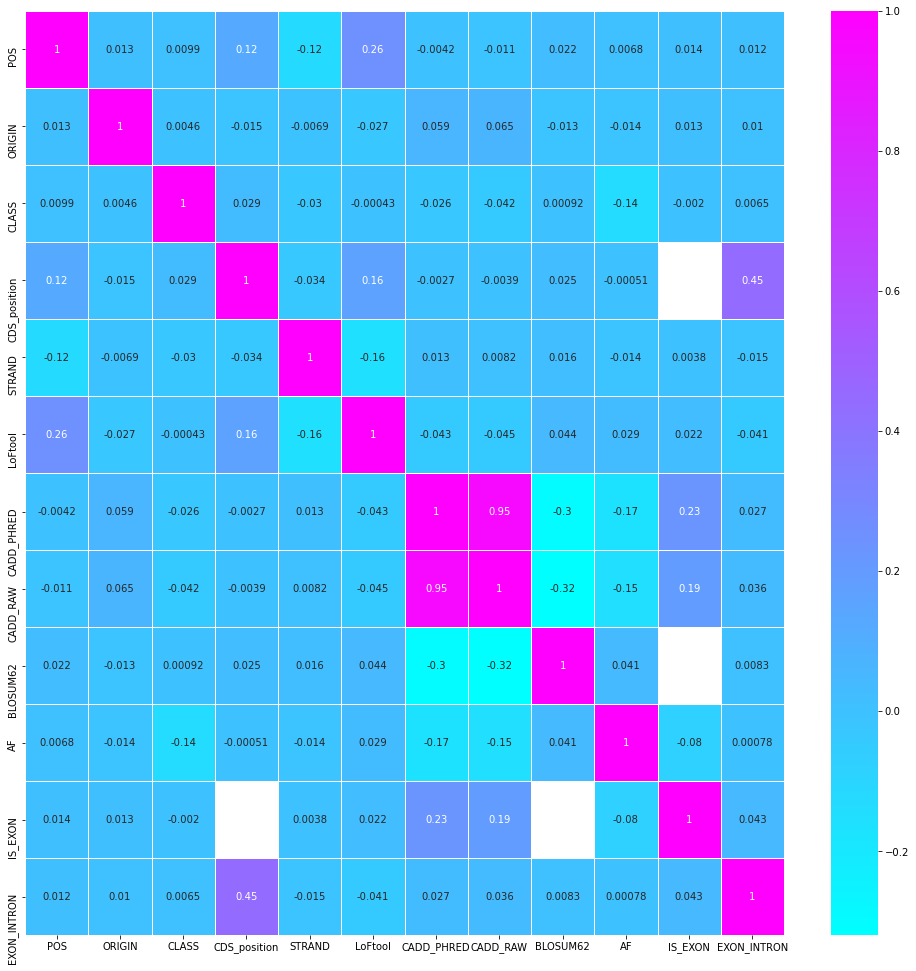

In [64]:
plt.figure(figsize = (17, 17))
sns.heatmap(data.corr(), annot = True, linewidths=.5, cmap = plt.cm.cool)

Como vemos que CADD_PHRED y CADD_RAW están correlacionadas, vamos a eliminar la que menos varianza tenga

In [65]:
cadd_data = data[["CADD_PHRED", "CADD_RAW"]]
cadd_data =(cadd_data-cadd_data.min())/(cadd_data.max()-cadd_data.min())
cadd_data.std()

CADD_PHRED    0.132520
CADD_RAW      0.073522
dtype: float64

In [66]:
data = data.drop(columns=["CADD_RAW"])
data

,CHROM,POS,REF,ALT,CLNDN,ORIGIN,CLASS,Consequence,IMPACT,SYMBOL,Feature,CDS_position,Amino_acids,STRAND,SIFT,PolyPhen,LoFtool,CADD_PHRED,BLOSUM62,Amino_acids_target,AF,IS_EXON,EXON_INTRON
0,1,1168180,G,C,[not_specified],1,0,[missense_variant],MODERATE,B3GALT6,NM_080605.3,0.033481,E,1.0,tolerated,benign,NaN,1.053,2.0,D,0.10020,True,1.000000
1,1,1470752,G,A,"[Spinocerebellar_ataxia_21, not_provided]",1,0,[missense_variant],MODERATE,TMEM240,NM_001114748.1,0.032646,P,-1.0,deleterious_low_confidence,benign,NaN,31.000,-3.0,L,0.00000,True,1.000000
2,1,1737942,A,G,"[Strabismus, Nystagmus, Hypothyroidism, Intell...",35,1,"[missense_variant, 5_prime_UTR_variant]",MODERATE,GNB1,NM_002074.4,0.015295,I,-1.0,deleterious,probably_damaging,NaN,28.100,-1.0,T,0.00000,True,0.500000
3,1,2160305,G,A,"[Shprintzen, Goldberg_syndrome, not_provided]",33,0,[missense_variant],MODERATE,SKI,XM_005244775.1,0.006362,G,1.0,NaN,unknown,NaN,22.500,NaN,S,0.00000,True,0.142857
4,1,2160305,G,T,"[Shprintzen, Goldberg_syndrome]",33,0,[missense_variant],MODERATE,SKI,XM_005244775.1,0.006362,G,1.0,NaN,unknown,NaN,24.700,-3.0,C,0.00000,True,0.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65183,X,154158201,T,G,"[Hereditary_factor_VIII_deficiency_disease, no...",1,0,[synonymous_variant],LOW,F8,NM_000132.3,0.354794,S,-1.0,NaN,unknown,0.00158,0.105,NaN,*,0.13923,True,0.538462
65184,X,154159118,C,T,"[not_specified, Hemophilia_A, _FVIII_Deficiency]",1,1,[missense_variant],MODERATE,F8,NM_000132.3,0.270573,V,-1.0,tolerated,benign,0.00158,0.002,3.0,I,0.00130,True,0.538462
65185,X,154194886,C,T,"[not_specified, Hemophilia_A, _FVIII_Deficiency]",1,0,[synonymous_variant],LOW,F8,NM_000132.3,0.099651,A,-1.0,NaN,unknown,0.00158,12.850,NaN,*,0.01110,True,0.307692
65186,X,154490187,T,C,"[Non, syndromic_X, linked_intellectual_disabil...",1,0,[synonymous_variant],LOW,RAB39B,NM_171998.2,0.049780,T,-1.0,NaN,unknown,NaN,0.130,NaN,*,0.00030,True,1.000000


También vemos que hay una fuerte relación entre LoFTool - POS y EXON_INTRON - CDS_position

<AxesSubplot:>

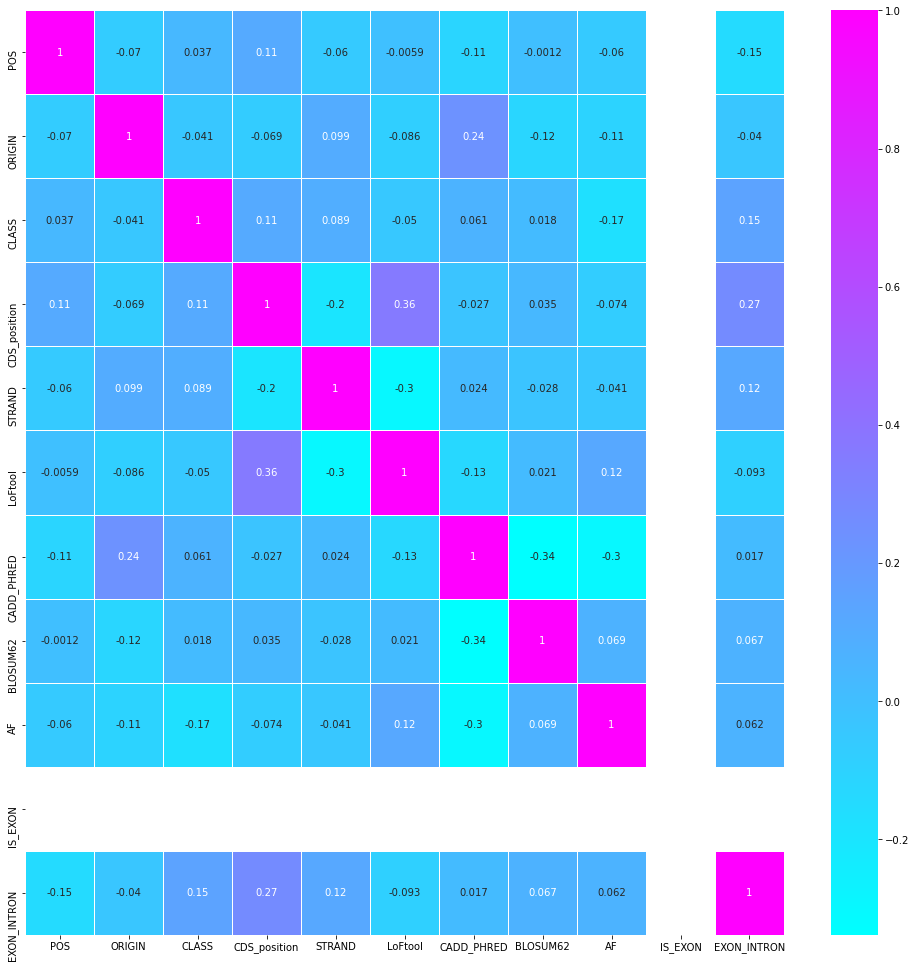

In [67]:
corr_by_chrom = data[data["CHROM"] == "2"].corr()
plt.figure(figsize = (17, 17))
sns.heatmap(corr_by_chrom, annot = True, linewidths=.5, cmap = plt.cm.cool)

C:\Users\angel\anaconda3\envs\genetic_variants\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CDS_position', ylabel='LoFtool'>

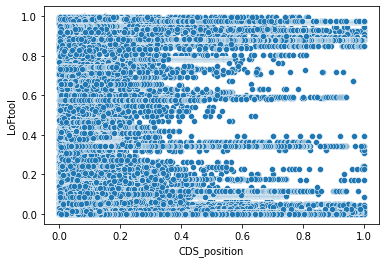

In [68]:
sns.scatterplot(data["CDS_position"], data["LoFtool"])

Como no vemos una tendencia clara vamos a proseguir con esta variable pese a que haya una correlación del 36%

C:\Users\angel\anaconda3\envs\genetic_variants\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CDS_position', ylabel='EXON_INTRON'>

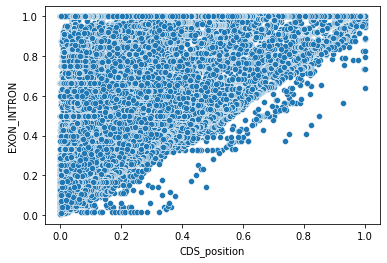

In [69]:
sns.scatterplot(data["CDS_position"], data["EXON_INTRON"])

Tiene sentido que no haya posiciones elevadas en la proteina para los segmentos de exon o intron donde se encuentran más cerca del inicio.

In [70]:
data

,CHROM,POS,REF,ALT,CLNDN,ORIGIN,CLASS,Consequence,IMPACT,SYMBOL,Feature,CDS_position,Amino_acids,STRAND,SIFT,PolyPhen,LoFtool,CADD_PHRED,BLOSUM62,Amino_acids_target,AF,IS_EXON,EXON_INTRON
0,1,1168180,G,C,[not_specified],1,0,[missense_variant],MODERATE,B3GALT6,NM_080605.3,0.033481,E,1.0,tolerated,benign,NaN,1.053,2.0,D,0.10020,True,1.000000
1,1,1470752,G,A,"[Spinocerebellar_ataxia_21, not_provided]",1,0,[missense_variant],MODERATE,TMEM240,NM_001114748.1,0.032646,P,-1.0,deleterious_low_confidence,benign,NaN,31.000,-3.0,L,0.00000,True,1.000000
2,1,1737942,A,G,"[Strabismus, Nystagmus, Hypothyroidism, Intell...",35,1,"[missense_variant, 5_prime_UTR_variant]",MODERATE,GNB1,NM_002074.4,0.015295,I,-1.0,deleterious,probably_damaging,NaN,28.100,-1.0,T,0.00000,True,0.500000
3,1,2160305,G,A,"[Shprintzen, Goldberg_syndrome, not_provided]",33,0,[missense_variant],MODERATE,SKI,XM_005244775.1,0.006362,G,1.0,NaN,unknown,NaN,22.500,NaN,S,0.00000,True,0.142857
4,1,2160305,G,T,"[Shprintzen, Goldberg_syndrome]",33,0,[missense_variant],MODERATE,SKI,XM_005244775.1,0.006362,G,1.0,NaN,unknown,NaN,24.700,-3.0,C,0.00000,True,0.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65183,X,154158201,T,G,"[Hereditary_factor_VIII_deficiency_disease, no...",1,0,[synonymous_variant],LOW,F8,NM_000132.3,0.354794,S,-1.0,NaN,unknown,0.00158,0.105,NaN,*,0.13923,True,0.538462
65184,X,154159118,C,T,"[not_specified, Hemophilia_A, _FVIII_Deficiency]",1,1,[missense_variant],MODERATE,F8,NM_000132.3,0.270573,V,-1.0,tolerated,benign,0.00158,0.002,3.0,I,0.00130,True,0.538462
65185,X,154194886,C,T,"[not_specified, Hemophilia_A, _FVIII_Deficiency]",1,0,[synonymous_variant],LOW,F8,NM_000132.3,0.099651,A,-1.0,NaN,unknown,0.00158,12.850,NaN,*,0.01110,True,0.307692
65186,X,154490187,T,C,"[Non, syndromic_X, linked_intellectual_disabil...",1,0,[synonymous_variant],LOW,RAB39B,NM_171998.2,0.049780,T,-1.0,NaN,unknown,NaN,0.130,NaN,*,0.00030,True,1.000000


In [71]:
data.to_csv('data_filtered.csv')